In [1]:
# general imports usually needed
import numpy as np
import matplotlib as mpl
import matplotlib.animation
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

In [2]:
# libraries more specific to this lecture notebook
import os.path
import sys
sys.path.append('../../src')
from ml_python_class.config import DATA_DIR

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
# notebook wide settings to make plots more readable and visually better to understand
np.set_printoptions(suppress=True)

#%matplotlib widget
#%matplotlib inline

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=18)
plt.rc('legend', fontsize=14)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # default figure size if not specified in plot
plt.style.use('seaborn-darkgrid')


# 4. (Chapter 4) Training Models

In this chapter we will begin our study of Machine Learning algorithms in earnest.  Up
to this point you have gotten a taste of using some ML models as black boxes.
You don't really know internally what they are doing or how they work.  But still, learning
the API of how to create data sets and set up models for training, and knowning in
general what supervisied learning is and how you train a model to fit a dataset is
sufficient to start working with ML.

However, at some point you will be working with a dataset and you will get some
weird or unexpected results.  Also there are myriads of parameters and hyper-parameters,
not to mention issues with formatting and cleaning your data, and tweaking
training procedures, etc. that will all always be a bit mysterious and/or you will only
learn by wrote checklists, if you don't understand some of the fundamentals of the
internal implemenations of the various ML algorithms you use.

Understanding whats under the hood will help you quickly understand what types of ML
models will be promising or not for the data you have.  It will give you an understanding
of the hyper parameters the model uses, and what you might want to try for these parameters
to get good results.  Understanding whats under the hood will also allow you to debug
and spot issues you have with training and debugging your models.  It will allow you
to perform error analysis, and better understand why your models may be working, and why
they may be failing, so that you can tweak things to improve their performance.

In short, while you can be a push-button/check-list using data analyst, if you eventually
want to improve your skills and become a better data scientist, you need to start
learning the internal working of ML algorithms.  Our goal in this class is to begin
your journey along this path.  We won't become deep experts on any of the ML methods we 
will look at, but we hope to introduce you to the fundamental concepts and inner
workings, so that you can beging to understand more deeply how the techniques work.

In this chapter, and units of our course, we will begin by looking at **linear regression**
(which we have used already), followed by **logistic regression**.  These units are very
important, as these models have basic concepts that are often similar across many types
of ML algorithms.  We will look at the idea of the **cost function** (or **fitness function**),
and how this can be used with techniques like **gradient descent** to fit the parameters
of a model in general to make predictions about a set of data.  Linear regression
is a technique for performing regression modeling (predict real valued outputs), while
logistic regression is usefule for classification (despite its name, which is a bit
misleading at best).  By comparing similarities and differences of cost functions and
fitting models between regression and classification tasks, we will illustrate some general
principles of ML that apply to many types of supervisied learning models, whether
regression or classification tasks.

## 4.1 Linear Regression

Linear regression is a technique to fit a line (linear) to a set of data
points.  A linear model assumes a linear relationship between the attributes
and the value we wish to predict.  Linear relationships are common, though not
all system outputs are simple linear combinations of their inputs.

In the simplest case, we could have a single attribute $x$
and single value we want to predict $y$.  In our HOML textbook, the author
gave an example using GDP and life satisfaction in chapter 1.

Here is another example,  In the following dataset we want to try and relate
the size of a house (in square feet) to its selling price.

In [4]:
# load data into pandas dataframe
house = pd.read_csv('../../data/housing-prices-portland-or.csv')
house.drop('bedrooms', axis=1, inplace=True) # we are not using bedrooms attribute in this example
house.price = house.price / 1000.0 # specify house price in 1000s $

# use x and y for convenience
y = house.price.values
x = house.sqft.values

In [5]:
house.describe()

,sqft,price
count,47.000000,47.00000
mean,2000.680851,340.41266
std,794.702354,125.03990
min,852.000000,169.90000
25%,1432.000000,249.90000
50%,1888.000000,299.90000
75%,2269.000000,384.45000
max,4478.000000,699.90000


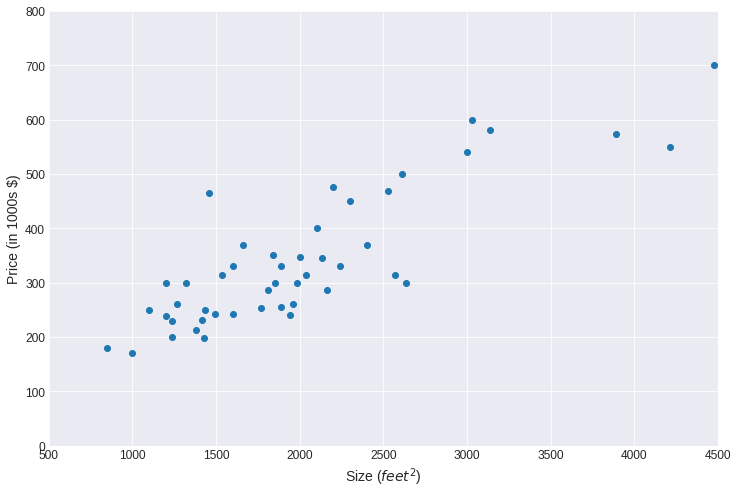

In [6]:
# display scatter plot of the data
plt.scatter(x, y)
plt.axis([500, 4500, 0, 800])
plt.xlabel('Size ($feet^2$)')
plt.ylabel('Price (in 1000s $)');

The data looks like it might reasonably have a linear relationship, e.g. for each change in
size of the house by 1 square foot, there is probably a constant increase in the
valued prices of the house.

You probably at some point learned (and may have forgotten), how to define a line
that goes through 2 given points of data.  For example, the first two points of our
house data are these points.

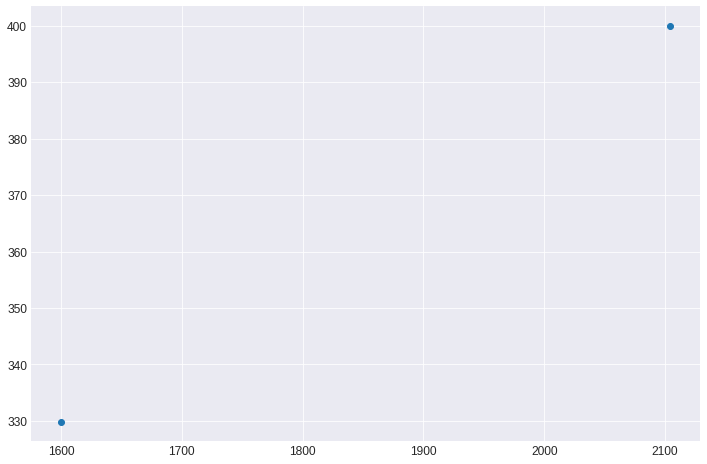

In [7]:
# plot only the first 2 points
plt.scatter(x[:2], y[:2]);

We can find a line that fits these points perfectly (goes through both of them), since
two points define a line, using the slope-intercept equation.

$$
y = b + mx
$$

where $m$ represents the slope of the line, and $b$ the y-intercept of the line (the value
of $y$ when $x = 0$).

The slope of the line, in case you have forgotten, is the change in $y$ divided by the
change in $x$, which we can find easily enough for our two points.

In [8]:
# difference of y divided by differnce of x is our slope
m = (y[1] - y[0]) / (x[1] - x[0])
m

0.1388888888888889

There are infinitely many lines with a slope of $m = 0.1389$, so we need to find the value
of the other parameter $b$ to find the one line with that slope that goes through these
points.  We can do that by rearranging the slope-intercept equation and using either of
our points to determine $y$

$$
b = y - mx
$$

In [9]:
# determine the intercept
b = y[0] - m * x[0]
b

107.67777777777775

So this gives an intercept of $107.6$ (thousands of dollars).

With our parameters $m$ and $b$ we can visualize the line that goes through these 2 points.

In [10]:
x_points = np.linspace(1500, 2200, 100)
y_points = b + m * x_points

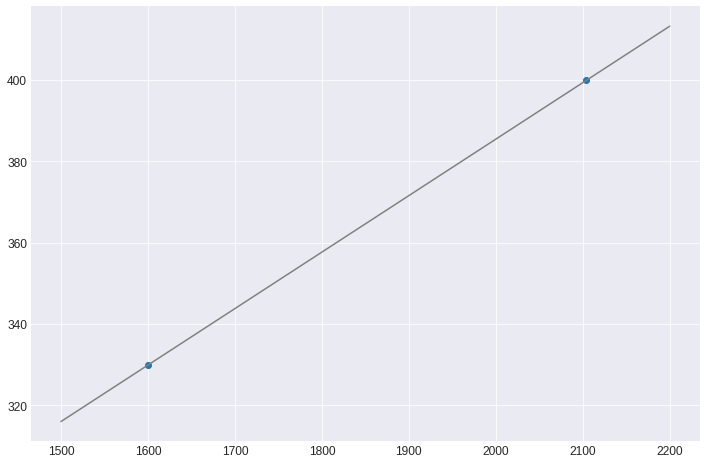

In [11]:
# plot the 2 points on the line
plt.scatter(x[:2], y[:2]);

# plot the line we determined goes through them
plt.plot(x_points, y_points, 'grey');

Of course this line fits the two points perfectly, it goes through both of them so the
error at each point of the model line is 0.

But what if we have 3 points?

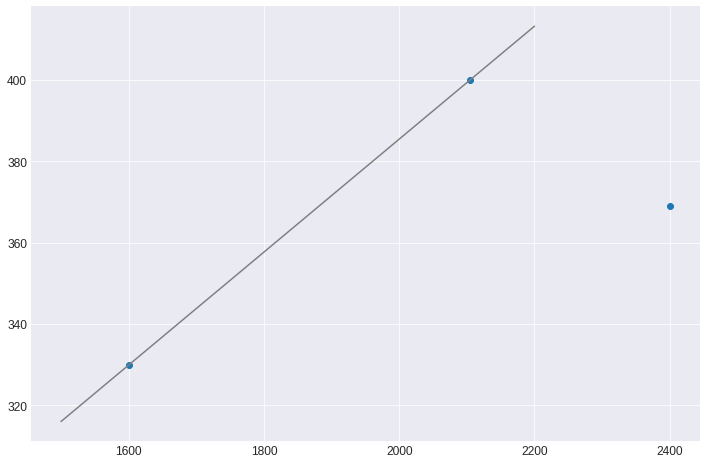

In [12]:
# plot the first 3 points
plt.scatter(x[:3], y[:3]);

# plot the line we determined goes through them
plt.plot(x_points, y_points, 'grey');

What is the line that best fits these 3 points?  Should it instead go through the point 
at $(1600, 330)$ and the new point?  Or should it not go through any of the points but 
between all of them?  What we need is a **cost function**, a formal measurement of the 
"fittedness"  of a line with regard to a set of points we believe have a linear
relationship.

Our line for these first two points is probably not a good fit for the data as a whole.

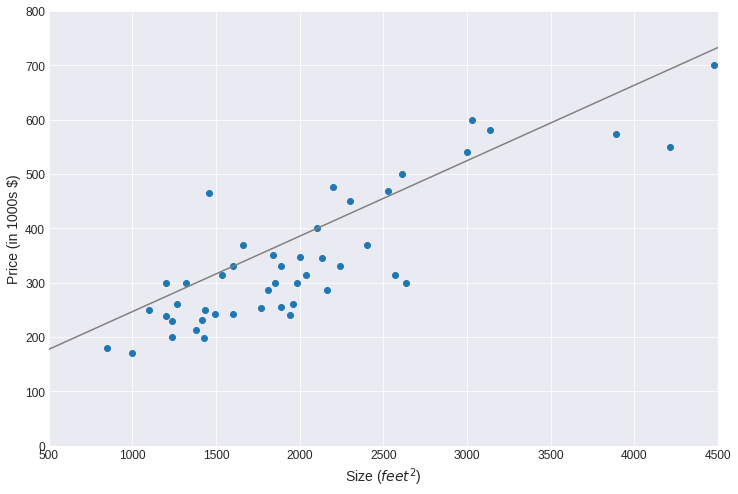

In [13]:
# display scatter plot of the data
plt.scatter(x, y)
plt.axis([500, 4500, 0, 800])
plt.xlabel('Size ($feet^2$)')
plt.ylabel('Price (in 1000s $)');

# display the line we fit for the first 2 points again, extend the line for the
# range from 500 to 3100 now
x_points = np.linspace(500, 4500, 100)
y_points = b + m * x_points
plt.plot(x_points, y_points, 'grey');

The line in this case doesn't look too bad, the slope may be about right, though the intercept
looks like it might be better if we lowered it.  We will talk about a way to formalize
the idea of "fitedness" with a cost function in a bit.  But we have seen previously
a method that will determine the paramters $m$ and $b$ that is the "best fit" for a line
by some cost measure, the `np.polyfit()` function.  Here is the best fit line
from the standard linear regression cost function for this data, plotted with the data and our
original line of the first 2 points we calculated.

In [14]:
# polyfit fits a nth degree polynomial to the data x to predict y.
# using n=1 means fit a degree 1 polynomial, e.g. a line
(m_best, b_best) = np.polyfit(x, y, 1)
print('slope = ', m_best)
print('intercept = ', b_best)

slope =  0.13452528772024128
intercept =  71.27049244872902


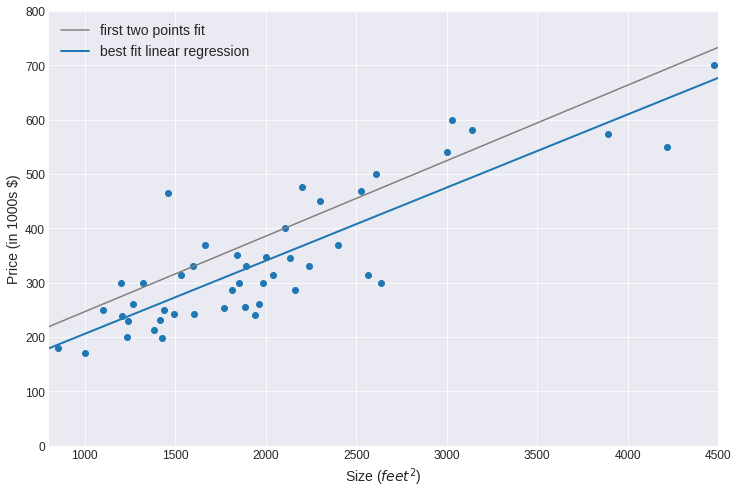

In [15]:
# display scatter plot of the data
plt.scatter(x, y)
plt.axis([800, 4500, 0, 800])
plt.xlabel('Size ($feet^2$)')
plt.ylabel('Price (in 1000s $)');

# display the line we fit for the first 2 points again, extend the line for the
# range from 500 to 3100 now
x_points = np.linspace(500, 4500, 100)
y_points = b + m * x_points
plt.plot(x_points, y_points, 'grey', label='first two points fit');


# now display the actual best fit line as determined by linear regression
x_points = np.linspace(500, 4500, 100)
y_best = b_best + m_best * x_points
plt.plot(x_points, y_best, 'C0', lw=2.0, label='best fit linear regression');

plt.legend();

As we said the slope was not too far off, though that was just luck.  Lots of pairs of
points of course give very different slopes, even slopes perpindicular to the
best fit line.

BTW, the seaborn library has a plot specifically designed for creating a scatter plot
of data with a possible linear relationship, display the best fit linear regression
model, and also giving a calculated error bounds around the best fit line.

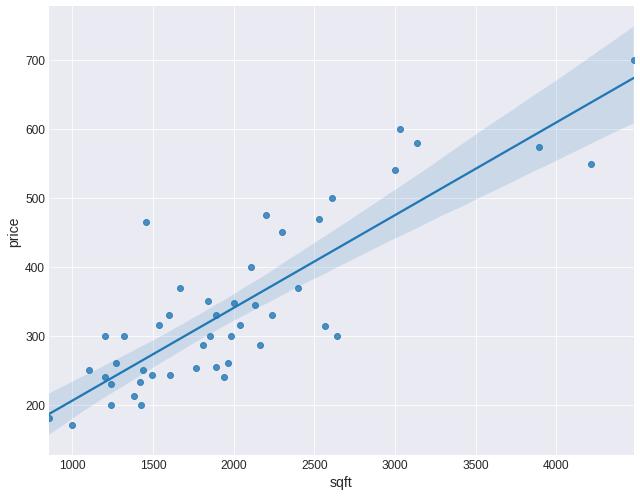

In [16]:
sbn.lmplot(x='sqft', y='price', data=house, height=7, aspect=9.0/7.0);

Before we talk about the cost function and how to fit the parameters, lets change our notation
a bit and generalize the model a bit.

In general, for ML models, we think of $m$ and $b$ as **parameters** of the model that need
to be **fit**.  Different values of the parameters give different **hypothesis** functions.
For example, we showed two hypothesis functions, the model where we fit the first 2 lines
gives one set of predicitions for each house size over the range of values.  The best
fit model using linear regression gives another set of hypothesis over this range.

In general ML academics like to use $\theta$ (greek letter Theta) as the names for all of the
parameters.  So the general equation of a line is really our hypothesis or prediction
function, given some set of parameters.  Formally we write it like this:

$$
\hat{y} = \theta_0 + \theta_1 x_1
$$

Where we have the following.

- $\hat{y}$ is the predicted value.  We use $y$ for the actual data values we are trying to
predict, and $\hat{y}$ for values generated from a hypothesis function like our linear
model here.
- $\theta_0$ is the **intercept term** of our model.  In general many othre models have 
a term like this that is not a product of any of the features, and in general it is often
referred to as the **bias term**.
- $\theta_1$ is the slope of our linear model with a single attribute (house size in square 
feet).
- $x_1$ is our first (and only) **feature** or **attribute** of this data.
The data has a single feature $x_1$ which is the size of a house in square feet,
and a single output or value we want to predict $y$ which is the price of the house.
- $n$ is the **number of features** or attributes of the model.  So far this model has
only a single feature so $n = 1$
- $m$ is the **number of samples** or **number of experiments** in the dataset.
We didn't mention, but as you can see from the output of `describe()` this
data set contains a set of 47 houses, so $m = 47$.  As we mentioned in
previous videos, usually our data tables or DataFrames have $m$ rows of samples of
data by $n$ columns of features we will use for prediction.

Most of the time we will be working with data with many more features than $n = 1$ in it.
But the technique for linear regression (and other ML techniques) easily and directly
generalizes to fitting a linear model to multi-dimensional data (e.g. we are fitting a
plane when $n=2$ and a hyperplane when $n > 3$).  The general form of the linear
regression model equation for $n$ attributes is:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

Where $x_1, x_2, \cdots, x_n$ are the $n$ attributes of the model we are trying to
linearly fit to our data $y$.

This general form of the linear regression model can be written more concisely using
a vectorized form (from linear algebra, see the review of linear algebra video
now to be introduced to some of these concepts).

$$
\hat{y} = h_\theta(x) = \theta \cdot x
$$

- $h_\theta(x)$ is the hypothesis function for a set of paramters $\theta$.
- $\theta$ is the model's **parameter vector**, containing the bias term $\theta_0$ and
the feature weights $\theta_1$ to $\theta_n$.  
- $x$ is the **feature vector**, containing $x_0$ to $x_n$.  Notice we didn't have
a $x_0$ before, here $x_0$ is always equal to 1.
- $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which of course
comes out to $\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$.

Lets give an example of using this vectorized form to try and make what we are doing clearer.
We already have a perfectly good way to represent a vectorized hypothesis using NumPy
and vectorized operations as we did previously.  But we can also perform the same
calculation in the following way.

For example, the $\theta$ vector represents a single hypothesis.  Lets create a NumPy
array (a vector) of the best fit hypothesis we had determined above for our data
with $n = 1$ feature. 

In [17]:
Theta = np.array([b_best, m_best])
print(Theta)
print(Theta.shape)

[71.27049245  0.13452529]
(2,)


To perform a matrix/matrix multiplication we need the x values that we would like predictions for.
For example, we could see how our hypothesis parameters `Theta` predict the set of 47 actual
house sizes we have in our data. 

But we also need a feature matrix $X$ and we need to add the bias term as an additional
column.  The result should be a `(47,2)` shaped matrix where column 0 represents the $x_0$
values, and is all 1's.

**NOTE**: this is what `scikit` learn for example expects the `X` input matrix to be
shaped as, with features/attributes as columns, and the samples in the rows.
This differs slightly from using column vectors, which our textbook briefly
mentions.  But in short it means when we calculate the hypothesis shortly,
we will modify the equation or order slightly because of our matrix shapes,
but the result is the same calculation.

In [18]:
n = 1
m = len(x)

# create an matrix of of m rows still, but n+1 columns so we can add in the bias/intercept
# feature as column 0
X = np.ones( (m, n+1) )


# assign column 1 to be the 47 house sizes we want to make predictions of
X[:, 1] = x

print(X)
print(X.shape)

[[   1. 2104.]
 [   1. 1600.]
 [   1. 2400.]
 [   1. 1416.]
 [   1. 3000.]
 [   1. 1985.]
 [   1. 1534.]
 [   1. 1427.]
 [   1. 1380.]
 [   1. 1494.]
 [   1. 1940.]
 [   1. 2000.]
 [   1. 1890.]
 [   1. 4478.]
 [   1. 1268.]
 [   1. 2300.]
 [   1. 1320.]
 [   1. 1236.]
 [   1. 2609.]
 [   1. 3031.]
 [   1. 1767.]
 [   1. 1888.]
 [   1. 1604.]
 [   1. 1962.]
 [   1. 3890.]
 [   1. 1100.]
 [   1. 1458.]
 [   1. 2526.]
 [   1. 2200.]
 [   1. 2637.]
 [   1. 1839.]
 [   1. 1000.]
 [   1. 2040.]
 [   1. 3137.]
 [   1. 1811.]
 [   1. 1437.]
 [   1. 1239.]
 [   1. 2132.]
 [   1. 4215.]
 [   1. 2162.]
 [   1. 1664.]
 [   1. 2238.]
 [   1. 2567.]
 [   1. 1200.]
 [   1.  852.]
 [   1. 1852.]
 [   1. 1203.]]
(47, 2)


Now given a `(1, 2)` shaped column vector of the hypothesis parameters
and a `(47,2)` shaped matrix of the features `X`, we can use the dot product
(matrix multiplication) to calculate the hypothesis simultaneously for all of these
house prices we want a prediction for.  

**NOTE**: this differs slightly from the books formulation because we have 
formatted our `X` array with each sample in a row.  Thus to get the correct
vectorized matrix multiplication, if we `transpose()` X instead here, we
end up with a `(2,)` shaped vector multiplied by a `(2,47)` transposed shaped
X matrix, which is defined for matrix multiplication.

In [19]:
np.dot(Theta, X.T)

array([354.31169781, 286.5109528 , 394.13118298, 261.75829986,
       474.84635561, 338.30318857, 277.63228381, 263.23807803,
       256.9153895 , 272.2512723 , 332.24955063, 340.32106789,
       325.52328624, 673.67473086, 241.84855728, 380.67865421,
       248.84387224, 237.54374807, 422.24696811, 479.01663953,
       308.97667585, 325.25423566, 287.04905395, 335.20910696,
       594.57386168, 219.24830894, 267.40836194, 411.08136923,
       367.22612543, 426.01367617, 318.66249657, 205.79578017,
       345.7020794 , 493.27632003, 314.89578851, 264.5833309 ,
       237.94732393, 358.07840587, 638.29458019, 362.1141645 ,
       295.12057122, 372.33808637, 416.59690603, 232.70083771,
       185.88603759, 320.41132531, 233.10441358])

Or instead of transposing X, we chould just rearrange the order of X and Theta
in the matrix multiplication.  The result is still the same calculation.

In [20]:
np.dot(X, Theta)

array([354.31169781, 286.5109528 , 394.13118298, 261.75829986,
       474.84635561, 338.30318857, 277.63228381, 263.23807803,
       256.9153895 , 272.2512723 , 332.24955063, 340.32106789,
       325.52328624, 673.67473086, 241.84855728, 380.67865421,
       248.84387224, 237.54374807, 422.24696811, 479.01663953,
       308.97667585, 325.25423566, 287.04905395, 335.20910696,
       594.57386168, 219.24830894, 267.40836194, 411.08136923,
       367.22612543, 426.01367617, 318.66249657, 205.79578017,
       345.7020794 , 493.27632003, 314.89578851, 264.5833309 ,
       237.94732393, 358.07840587, 638.29458019, 362.1141645 ,
       295.12057122, 372.33808637, 416.59690603, 232.70083771,
       185.88603759, 320.41132531, 233.10441358])

In [21]:
y_hat = np.dot(Theta, X.T)
print(y_hat.shape)

(47,)


This last cell was basically a vectorized form of the hypothesis function calculation.
We can compare our hypothesized values to the actual values in a plot.  Since we used
the `Theta` parameters of the best fit line, our hypothesized points will be on that
best fitting linear model of the data:

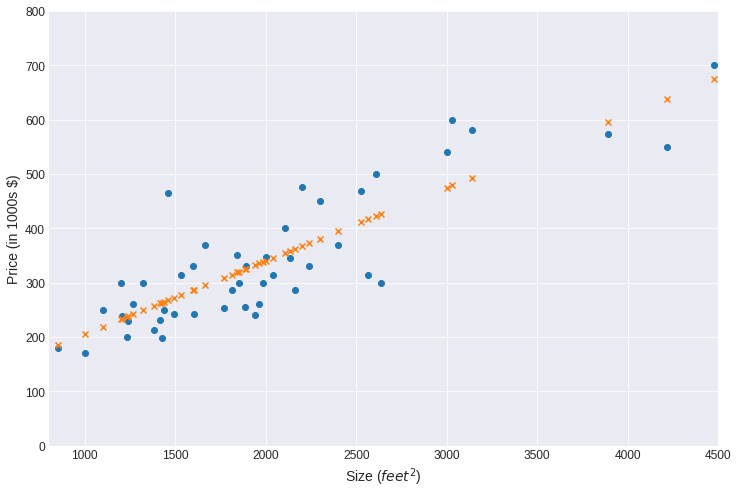

In [22]:
# display scatter plot of the data
plt.scatter(x, y)
plt.axis([800, 4500, 0, 800])
plt.xlabel('Size ($feet^2$)')
plt.ylabel('Price (in 1000s $)');

# display the prediction points that result from our best fit hypothesis function
plt.scatter(x, y_hat, marker='x', c='C1');

These are the predictions for our best fit `Theta` parameters, you should be able to see
that each house size has a corresponding predicted price, which is the best prediction we
can make in some since from our fitted linear model.

So you may be wondering, why should we using this matrix-multiplication vectorized
method for calculating the hypothesis, when we cans simply do.

In [23]:
y_hat = b_best + m_best * x
y_hat.shape

(47,)

The answer is that, while this works for $n = 1$ or 5 or so features, imagine a real
dataset where you might have 100's or 1000's of features (or now adays millions is
not unreasonable).  In that case you have to use linear algebra and matrix representations
to represent your hypothesis parameters and your feature values as matrices that you want to
generate a hypothesis for.

### Cost Function

Ok that is the hypothesis function of the linear regression model.  But up to this point we have been
avoiding answering how exactly do we determine what it means to be the "best fitting" linear model
for some set of data.

Looking at the previous figure, it should be intuitive that the further away a prediction is from the
true price, the worse the prediction is.  So for example given one point and its prediction, we can
determine how good the prediction is by simply doing:

In [24]:
print('actual:    ', y[0])
print('predicted: ', y_hat[0])
print('error:     ', y_hat[0] - y[0])

actual:     399.9
predicted:  354.3116978121167
error:      -45.5883021878833


First of all its really the magnitude of this difference that is important.  So when we under
predict like here really the fact we were a bit over 45 (thousand) dollars off for this predictions is
what is important.  Smaller would be better, 0 error means we predict it perfectly.

But how we do on a single prediction isn't the whole story.  We want to know how we did predicting
**ALL** of the values.  We can use a vectorized subtraction to get all of our prediction errors in
one go.

In [25]:
error = y_hat - y
print(error)

[ -45.58830219  -43.3890472    25.13118298   29.75829986  -65.05364439
   38.40318857  -37.26771619   64.23907803   44.9153895    29.7512723
   92.25055063   -6.67893211   -4.47571376  -26.22526914  -18.05144272
  -69.22134579  -51.05612776   37.64374807  -77.75103189 -119.98336047
   56.07667585   70.25423566   44.14905395   75.30910696   20.67386168
  -30.65169106 -197.09163806  -57.91863077 -107.77387457  126.11367617
  -31.23750343   35.89578017   30.8020794   -86.62367997   28.99578851
   14.6833309     8.04732393   13.07840587   89.29458019   75.1141645
  -73.37942878   42.43808637  102.59690603  -66.29916229    5.98603759
   20.51132531   -6.39558642]


Sometimes we were too high, sometimes too low.  We want one single overall objective measure that tells
us how close to an error of 0 we are getting over all of the dataset samples.  We could just sum
up the errors.

In [26]:
np.sum(error)

-8.384404281969182e-12

The error is (basically) 0, which is very misleading.  We are off by almost $200k for example in one prediction.
We really want a sum of the **magnitude** of the error.  An obvious first idea is to just use the absolute
value.

In [27]:
np.sum(np.abs(error))

2444.2262579345606

This is known as the absolute error.

And if you want a feel for the average amount you are off for each prediction, we could simply
divide this by the number of samples to get the mean absolute error **MAE**.

In [28]:
np.sum(np.abs(error)) / m

52.00481399860767

So our best fit line has prediction errors (according to the MAE cost function) on average of $\pm 52$ thousand dollars here.

The MAE is an example of a cost function.  It tells us how well our model is doing in
making predictions (on the data we fitted the model with in this case).
The mean absolute error is not the one most commonly used as a cost function for ML training.
Instead we use the mean squared error **MSE**.  The reason why MSE is preferred is
for mathematical tractability, which we may go into more detail later, but basically
taking the derivative of a quadratic (square) function results in a smooth function, where
derivatives of functions with absolute values have discontinuities and are thus much messier to work
with analytically.

The full equation for the MSE cost function can be summarized as the following:

$$
\text{MSE}(X, h_{\theta}) = \frac{1}{m} \sum_{i=0}^{m-1} \big( \theta x^{(i)} - y^{(i)}  \big)^2
$$

Lets break this down a bit.  The MSE is a function of a set of attributes $X$ you want to evaluate
the cost of, and your hypothesis function $h_{\theta}$, which is a hypothesis for a fixed and determined
set of $\theta$ parameters, representing your model or hypothesis.

Our text added the notation $x^{(i)}$ and $y^{(i)}$.  This justs represents accessing the $i^{th}$ set
of values as a column vector in $X$, or the $i^{th}$ label in $y$.  So for example, for $i = 0$
we have

In [29]:
# x^(i) means the ith value of X here, so it is just an array index
# since each row in our X is a sample item, we get the ith sample like this
i = 0
X[i]

array([   1., 2104.])

In [30]:
# and y^(i) is simply the ith output label, so it is
y[i]

399.9

An asstute student may have noticed that I changed the summation from our textbook to sum from
$i = 0$ to $m - 1$ instead of from $1$ to $m$.  This is because in Python NumPy arrays we use
0 based indexing, so it is more natural to express our summations starting at index 0.

Also notice this part of the MSE

$$
\theta x^{(i)}
$$

This is simply calculating the hypothesis on the $i^{th}$ sample in the data `X`.  So since
$\hat{y}^{(i)} = \theta x^{(i)}$ we could also think of MSE as

$$
\text{MSE}(X, h_{\theta}) = \frac{1}{m} \sum_{i=0}^{m-1} \big( \hat{y}^{(i)} - y^{(i)}  \big)^2
$$

So really all we want to do is sum up the squares of the differences between the hypothesis
and the true value here.  So that is pretty similar to what we did before, just using the
square (quadratic) instead of the absolute value.

In [31]:
# the sum of the squared error
np.sum(error**2.0)

193464.47760070593

In [32]:
# the average of sum squared error
np.sum(error**2.0) / m

4116.265480866084

In this case, the average of our sum squared errors is still a squared value, so you can't really
directly compare this to our `y` labels since the units are different.  But we can take 
the square root, to give us what is known as the root mean squared error **RMSE**

In [33]:
# the square root of the average of sum squared error
# taking square root means answer is back in same units as our original data 'y'
np.sqrt(np.sum(error**2.0) / m)

64.15812872010906

This will differ from the **MAE** since we are squaring the error magnitudes instead of taking the
absolute value.  Squaring the errors has another effect besides being more mathematically
intractable.  Large errors have more effect on the final sum of the cost function.  Thus the **MSE**
will tend to be a bit more sensitive to large errors (and outliers) than the **MAE**.

Finally to put this all together, the MSE equation above suggests how we can compute
the MSE in a vectorized way given hypothesis $\theta$ and the data $X$ we want to estimate the
cost of.  We can do all of the operations in a single step like this:

In [34]:
error = np.dot(Theta, X.T) - y
mse = np.sum(error**2.0) / m
print('Mean Square Error: ', mse)
print('Root Mean Square Error: ', np.sqrt(mse))

Mean Square Error:  4116.265480866084
Root Mean Square Error:  64.15812872010906


And this represents the basic steps of a typical cost function for ML.  We calculate the error, which
are the difference between prediction and the label in supervised learning.  Then we sum up the
magnitude of the errors, where we calculate the magnitude using absolute value or the square of the
errors.  Dividing this sum by the number of samples gives the average or mean of this summed error.

### The Normal Equation

To fully understand this section it is suggested you work through and review basic
concepts from Linear Algebra.  I have a notebook and video materials available for you
to start with.

So the question you should be asking your self at this point is: "How does the
linear regression algorithm determine the values of the $\theta$ parameters
that result in the optimal cost?"  

If we didn't make it clear before, the MSE cost we demonstrated will be the very lowest
cost you can achieve using a squared error cost function on this set of 47 points.
But how do we know you can't get any lower cost with some slightly different set
of $\theta$ model parameters?

One way we can achieve this is analytically, using the **Normal Equation**.
An analytical solution is not always possible for a Machine Learning
algorithm or other statistical method.  But for the case of a linear equation, we
can use vector/matrix linear algebra to exactly solve and find the best
$\theta$ parameters for the data.

The normal equation can be expressed like this:

$$
\hat{\theta} = \big( X^T X\big)^{-1} X^T y
$$

Where

- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
- $X$ is still our matrix of attributes, with the added column of 1's for the
intercept/bias term.
- $y$ is the vector of the target values.
- $Z^{-1}$ represents the inverse matrix operation, $Z^T$ is just a matrix transpose.

Fully deriving this equation is beyond the scope of this class, but here is a general
description of how it is done.  If you start with the MSE cost function, we 
want to find the values of $\theta$ that give the minimal cost.  If this was
a simple quadratic equation, we would normally do this by taking the derivative
of the equation, and solving the derivative to find the values of $\theta$ that
result in a derivative of 0.  Because when the derivative (or slope or gradient)
is 0, that means you are either at a minimum or a maximum of the function.
And further, since we are using a quadratic equation here, that means there is
a single minimum or maximum, and in this case it will always be a minimum.
Thus solving for where the derivative is 0 of the cost function will determine
the values of the $\theta$ parameters that minimize the cost.

We can verify the normal equation expression ourself on the data we are currently
using.  We already have `X` and `y` in the column matrix forms we need.

In [35]:
print(X.shape)
print(y.shape)

(47, 2)
(47,)


And recall, according to the `np.polyfit()` function, which is probably using some
form of the normal equation to calculate the parameters analytically, the best fit
theta paramters were (intercept at y=71.27, slope of m=0.1345):

In [36]:
Theta

array([71.27049245,  0.13452529])

So lets calculate the best fit theta paramters analytically ourselves using the normal
equation.  Here instead of using `np.dot()` function I will switch to the overloaded
`@` operator which will perform matrix multiplication the same as the dot function, but 
allows us to directly express the same normal equation in code.  But there is no
notation for the inverse, so we need to use the `np.linalg.inverse()` function to calculate
the inverse of the resulting matrix.

In [37]:
my_Theta = np.linalg.inv(X.T @ X) @ X.T @ y
my_Theta

array([71.27049245,  0.13452529])

We have actually already using linear regression previously.  Above we performed 
a linear regression using the `np.polyfit()` function.  We used the `LinearRegression`
from sklearn in a previous lecture.  Doing a regression using sklearn is fairly
simple.  Although, sklearn will add the bias term for you, so we need to pass in
a matrix X of our features without the bias / intercept term again.

In [38]:
from sklearn.linear_model import LinearRegression

X = house.sqft.values.reshape( (-1,1) ) # shapes into a m rows by 1 column matrix which is what we need here 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(71.2704924487291, array([0.13452529]))

As a final example before we move on, it is often useful to use fake data to better
understand how ML modeling works.  For example, we can generate a data set where
we know the true slope and intercept $\Theta$ coefficients.  We don't know what the
true parameters are for our house price data.  In fact, we don't really know for sure
if a linear relationship between the two variables is the best model, or if something
else might work better.  In theory and practice, even if we know that the relationship
between the variables is linear, it will be impossible to ever exactly recover the
parameters of the real data, because noise from measurement and other factors will
always obscure the relationship.

An example with made up data can make this concept clearer.  Lets create some made up
data where we know the true values of the slope and intercept parameters that we
will use to generate the points.  We will add some random noise into each point,
to demonstrate that the best fit will only be an approximation of the true
parameters (if it really is a linear function).

For example, lets create datawith an intercet of 4 and a slope of 3.  

We start with just a selection of random X attributes that range from 0 to 2.0.
We create a `(100, 1)` shaped matrix of these values.

In [39]:
X = 2.0 * np.random.rand(100, 1)
print(X.shape)
print(X.min())
print(X.max())

(100, 1)
0.01796748102930401
1.957647453468548


Now we create our target data.  The dependent variable has a linear relationship
with our independent `X`feature, with a slope of 3 and an intercept of 4 as we said.  
But we also add a bit of random noise (with a normal distribution, so with a mean of 0 and
a standard deviation of 1).

In [40]:
# y is a linear function of x with intercept term of 4 and slope of 3
y = 4.0 + 3.0 * X

# but the relationship is noisy, we add a bit of gaussian noise to each value
y = y + np.random.randn(100, 1)

print(y.shape)
print(y.min())
print(y.max())

(100, 1)
3.091108023916405
11.45067547552446


Text(0, 0.5, '$y$')

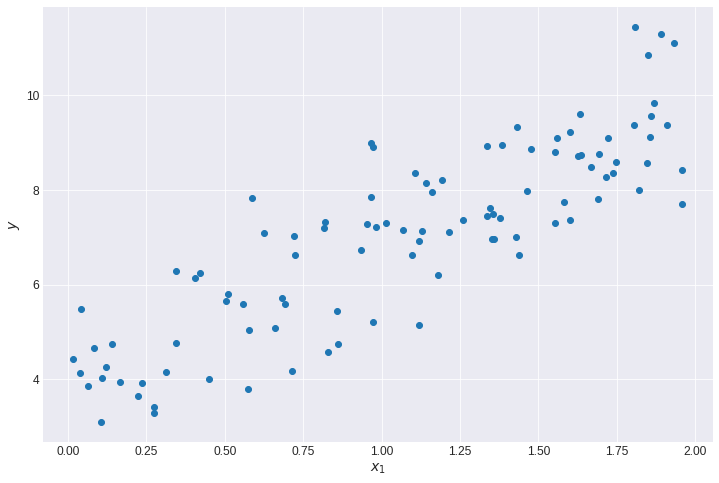

In [41]:
# plot the randomly generated dataset 
plt.scatter(X, y);
plt.xlabel('$x_1$')
plt.ylabel('$y$')

Now lets compute the $\theta$ best fit parameters using all 3 methods of linear
regression that we have seen so far.

Lets start by doing it by hand using the normal equation.  For the normal equation,
we have to have a matrix `X` that includes a column of bias terms, so we add
that first, then compute using the normal equation.

In [42]:
X_b = np.concatenate( (np.ones((100,1)), X), axis=1)

In [43]:
theta_normaleq = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_normaleq

array([[3.88016786],
       [2.92877235]])

Now lets try using `np.polyfit()`

In [44]:
theta_polyfit = np.polyfit(X.flatten(), y, 1)
theta_polyfit

array([[2.92877235],
       [3.88016786]])

Now use sklearn `LinearRegression` predictor.

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.88016786]), array([[2.92877235]]))

Although not always in the same order (you'll have to read the functions/methods
carefully to determine the bias term from the other theta parameters),
you should see they all get the same
fit of our function.  Lets show the best fit predictions using the sklearn
`predict()` function.

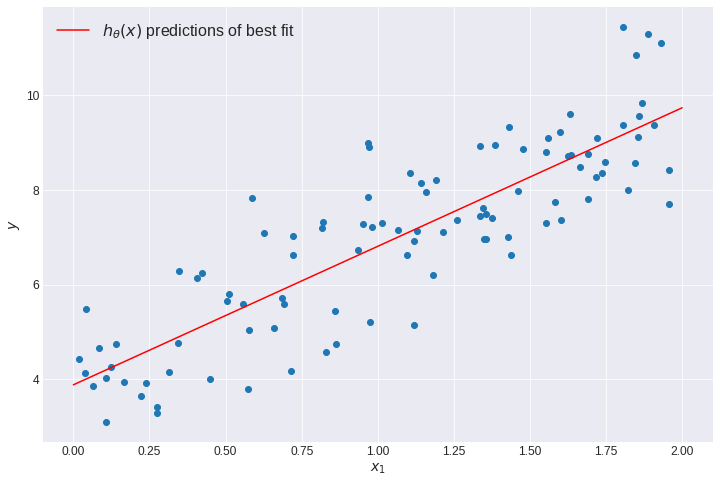

In [46]:
# plot the randomly generated dataset 
plt.scatter(X, y);
plt.xlabel('$x_1$')
plt.ylabel('$y$')

# to plot the prediction of a line, really only need 2 points on the line, so we choose
# the endpoints of the known range
x_new = np.array([[0], [2]])


# plot the prediction
y_hat = lin_reg.predict(x_new)
plt.plot(x_new, y_hat, 'r-', label=r'$h_{\theta}(x)$ predictions of best fit')
plt.legend(fontsize=16);

Since the data is generated randomly you may see a slightly different fit each time you
run.  The slope will be close to 3 and intercept close to 4, but never exact, and always
different.  Rerunning this example is also instructive because it teaches us something
about experimental sampling.  Imagine we are sampling 100 samples from a population
that has the true linear relationship with added noise we know created this data.
You know that your fit will not be exact.  But the amount of noise in your data
and other statistical properties will allow you to not only fit a linear model, but 
give estimates on how close the model is to the true parameters (i.e. the confidence
interval shown in the seaborn `lmplot()`.

**Side Example** In fact, if we sample 100 times and plot the best fit line,
you can see basically the same kind of confidence interval will be formed
that you can get from regular statistical analysis of the sampled data.

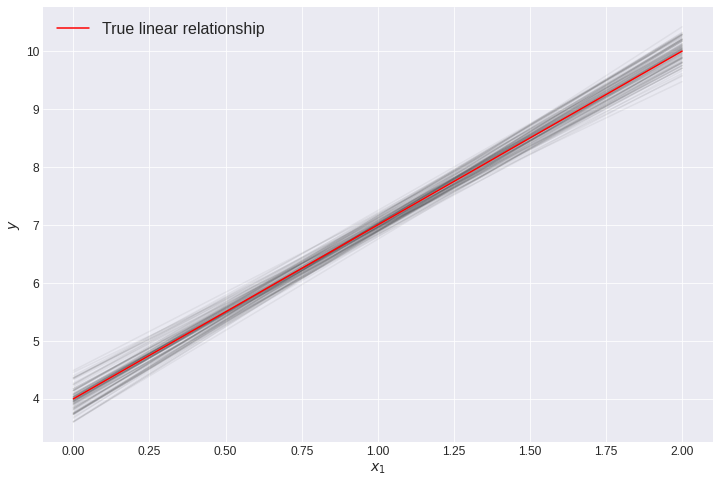

In [47]:
# perform experiment where we sample N times from our population, and fit and plot
# the resulting best fit linear regression model
N = 100
x_ends = np.array([[0.0], [2.0]])
for n in range(N):
    X = 2.0 * np.random.rand(100, 1)
    y = 4.0 + 3.0 * X
    y = y + np.random.randn(100, 1)
    slope, intercept = np.polyfit(X.flatten(), y, 1)
    y_fit = intercept + slope * x_ends
    plt.plot(x_ends, y_fit, 'black', alpha=0.05)
    
# plot the true linear relationship
y_actual = 4.0 + 3.0 * x_ends
plt.plot(x_ends, y_actual, 'red', label='True linear relationship')
plt.xlabel('$x_1$')
plt.ylabel('$y$');
plt.legend(fontsize=16);

Again it would be useful to know some basic statistics to understand this deeply.  But
we can estimate this exact same confidence band on the true linear relationship
by also analyzing the variance of the items we get with a single sample, which is how
these intervals are calculated on plots like the Seaborn `lmplot()`

### Computational Complexity

One of the main reasons that the normal equation is not used in normal practice, especially
for big data and large ML systems, is that it does not scale well as the number
of features grows.  The matrix inversion algorithm is easily implemented
as an $\mathcal{O}(n^3)$, though the best algorithms are known to be about
$\mathcal{O}(N^{2.4})$.  It is the matrix inversion that can make
using the normal equation intractable for large datasets.  The time complexity
means that when you increase the number of features by 2, the computation time
to compute the solution using the normal equation will increase by a factor of
5 to 8.

Both the normal equation, and SVD approaches that compute the pseudo-inverse
get very slow when the number of features grows large (e.g. 10,000 or more).
On the other hand, both are linear with regards to the number
of instances in the training data (they are $\mathcal{O}(m)$), so they handle
large training sets efficiently, provided they can fit in memory.

Also once you have learned the model, whether using the normal equation or the next
method we will look at, making predictions on new data is very fast.  It is linear
with regards to the number of features to make fectorized predictions once you have
a set of $\theta$ parameters for your predictor.

Becausing of computational issues with linear regression, and for many other
analytic approaches to ML learning, an alternative approach for training
is usually used instead.

## 4.2 Gradient Descent

**Gradient descent** is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems.  The general idea of gradient descent is to
tweak parameters iteratively in order to follow a gradient down to a minimum
of a cost function.



### Cost Function Intuition

Lets try and build an intuitive understanding of the shape of the MSE
cost function we are currently focusing on.

Lets ignore the intercept parameter and assume our linear function goes
through the origin at the $y = 0$ for the intercept.  In such a case
we only need to fit the single paramter $\theta_1$ or the slope.

Further lets use points generated with a slope of 1 with no noise.  For example.

In [48]:
# 3 points on the line y = 0 + 1 x
X = np.array([[1], 
              [2], 
              [3]])
y = np.array([[1, 2, 3]])

In [49]:
def cost_function_MSE(theta_1, X, y):
    """Given the theta_1 slope parameter, and a set of x features and the
    y targets, compute and return the MSE for the given parameter of 
    theta_1.
    
    Parameters
    ----------
    theta_1 - A NumPy array of theta_1 values to calculate cost of, which
        are the theta_1 or slope parameter for a
        hypothesis function h_{theta_1}
    X - A NumPy array of values to compute the MSE of, expected to be 
        a column matrix with each attribute/feature in a column, and
        m = number of samples = number of rows
    y - A NumPy array of values that are the true labels or target
        that our hypothesis function tries to predict.  Expected to
        be a vector of size (m,)
        
    Returns
    -------
    mse - Returns the means of the sume of the squared errors for the given theta_1
        parameter and our x inputs and y targets/labels
    """
    # get the number of samples and number of features
    m, n = X.shape
    
    # calculate predictions
    predictions = 0 + theta_1 @ X.T
    
    # calculate errors
    errors = predictions - y
    
    # calculate the sum squared error
    sse = np.sum(errors**2.0, axis=1)
    
    # calculate and return the mean of the sum squared errors
    mse = sse / m
    
    return mse

So for example, if our hypothesis funciton uses $\theta_1 = 1$ to predict, we
will get an error of 0, perfect predictions.

In [50]:
# make theta_1 an array, for reasons we will se in a moment
theta = np.array([1.0])
cost_function_MSE(theta, X, y)

array([0.])

But of course for $\theta_1$ not equal to 1, there will be some error, and the
further from the correct slope of 1, the more the error.

In [51]:
theta = np.array([1.1])
cost_function_MSE(theta, X, y)

array([0.04666667])

In [52]:
theta = np.array([0.5])
cost_function_MSE(theta, X, y)

array([1.16666667])

In [53]:
theta = np.array([2.0])
cost_function_MSE(theta, X, y)

array([4.66666667])

Our function is vectorized, so we can actually pass in a range of $\theta_1$ values
to the cost function, e.g.

In [54]:
theta = np.linspace(-1.0, 3.0, 7).reshape((7,1))
theta

array([[-1.        ],
       [-0.33333333],
       [ 0.33333333],
       [ 1.        ],
       [ 1.66666667],
       [ 2.33333333],
       [ 3.        ]])

And we will get back the 7 computed costs for each of the given candidate
values of $\theta_1$.

In [55]:
mse = cost_function_MSE(theta, X, y)
mse

array([18.66666667,  8.2962963 ,  2.07407407,  0.        ,  2.07407407,
        8.2962963 , 18.66666667])

This allows us to treat the cost function as a function of theta, that
takes theta as input and maps it to the associated cost.  If we plot the
cost function over a range of values, we see the following.

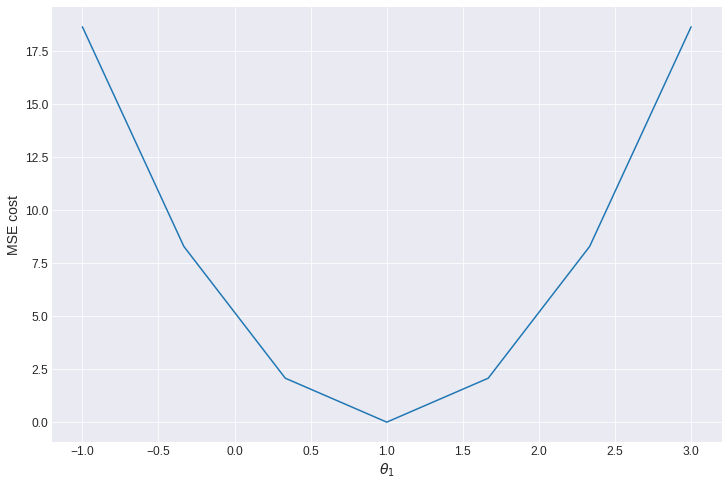

In [56]:
plt.plot(theta, mse);
plt.xlabel(r'$\theta_1$')
plt.ylabel('MSE cost');

The function is not actually so discontinuous.  In fact it is a smooth continuous
function, because it is a quadratic function, so it is essentially
a parabola.  We can see the true smooth shape if we increase our grid resolution.

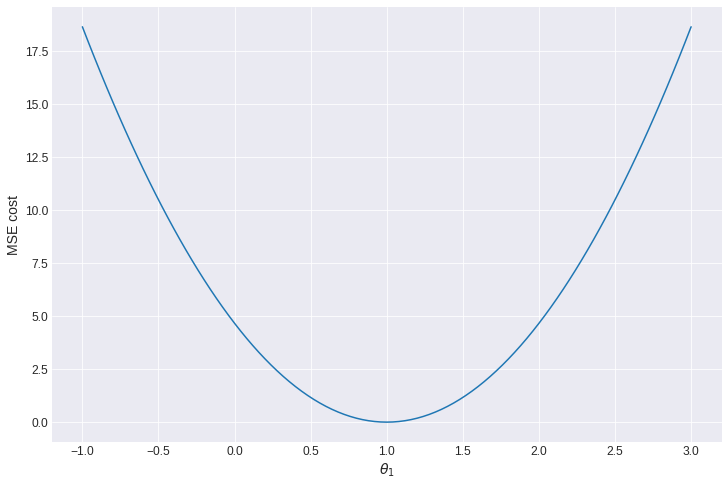

In [57]:
theta = np.linspace(-1.0, 3.0, 101).reshape((101,1))
mse = cost_function_MSE(theta, X, y)
plt.plot(theta, mse);
plt.xlabel(r'$\theta_1$')
plt.ylabel('MSE cost');

All of the MSE cost function look like this, though they usually won't
reach all of the way to 0 since usually a perfect fit of the data
is not possible.  They are shaped as a parabola in 2 dimensions because
a quadratic (square) function, which is what we do to the error for this
cost function, results in such a parabola.  If we add back in $\theta_0$
we will need a 3 dimensional plot to visualize the resulting shape, which
will be a bowl, but there will still be only a single global minum of the cost
function.  For example, still using our line with slope of 1 and intercept
of 0, the cost function using a contour plot looks like this.

In [58]:
def cost_function_MSE(Theta, X, y):
    """Fix our previous function to work in general case.  Now Theta can
    be an array of 2 or more parameters of theta, where each column is a
    different hypothesis to evaluate.  We expect Theta[0] (row 0) to 
    be the bias or intercept term, and Theta[1]  (row 1) and greater the remaining
    parameters.  We also now expect that the bias attribute is added to the
    X inputs before calling this function.
    
    Parameters
    ----------
    Theta - A NumPy array of 1 or more Theta hypothesis.  The shape 
        needs to be (n, t) where we have 1 row for each feature
        (column) of the inputs x.  We can have 1,2 or t rows to calculate
        the cost of 1, 2 ... t different hypothesis simultaneously.
    X - A NumPy array of values to compute the MSE of, expected to be 
        a matrix in normal form we expect of shape (m,n) where there 
        are m samples in the rows and n feature columns.  We need to
        transpose this matrix into columns holding the samples to match
        the normal way vector/matrix equations are specified.
    y - A NumPy array of values that are the true labels or target
        that our hypothesis function tries to predict.  Expected to
        be a vector of shape (m,)
        
    Returns
    -------
    mse - Returns the means of the sum of the squared errors for the given Theta
        parameters and our X inputs and y targets/labels
    """
    # get the number of samples and number of features
    m, n = X.shape
    
    # calculate predictions, result is a (t,m) shaped array of a set of
    # predictions for each of the m samples, one row for each of the
    # Theta predictions being calculated
    predictions = Theta.T @ X.T # X needs to be made into column matrix
    
    # calculate errors, resulting shape is still (t,m), the y target will be
    # subtracted from each row by broadcasting
    errors = predictions - y.reshape(1,-1)
    
    # calculate the sum squared error, only along axis 0 so we sum the rows.
    # result is (t,1) shaped
    sse = np.sum(errors**2.0, axis=1)
    
    # calculate and return the mean of the sum squared errors
    mse = sse / m
    
    return mse

In [59]:
# 3 points on the line y = 1 + 1 x
X = np.array([[0],
              [1], 
              [2], 
              [3]])
y = np.array([1, 2, 3, 4])

In [60]:
# we will create a 2D grid of theta_0, theta_1 pairs to evaluate
# range theta_0 from -2 to 2
grid_size = 101
#theta_0 = np.linspace(-1, 1, grid_size)
theta_0 = np.linspace(0, 2, grid_size)

# range theta_1 from -1 to 3 like we did before
#theta_1 = np.linspace(-0, 2, grid_size)
theta_1 = np.linspace(0, 2, grid_size)

# create all combinations of theta_0 and theta_1 as a (grid_size^2, 2) shaped
# array, which is what our cost function will expect
Theta = np.array(np.meshgrid(theta_0, theta_1)).reshape(2, -1)
print(Theta.shape)

(2, 10201)


In [61]:
# need to add in bias attribute to X  for our updated cost function now
X_b = np.c_[np.ones((4,1)), X]

# calculate cost function over theta_0, theta_1 pairs
mse = cost_function_MSE(Theta, X_b, y)

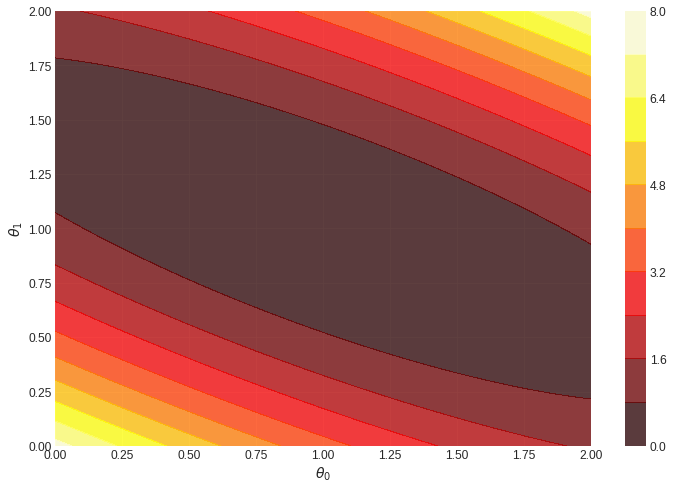

In [62]:
# contour expects X, Y and Z to all be 2d grids, so
Xp = Theta[0].reshape((grid_size, grid_size))
Yp = Theta[1].reshape((grid_size, grid_size))
Zp = mse.reshape((grid_size, grid_size))

# plot the contours
contours = plt.contourf(Xp, Yp, Zp, 10, alpha=0.75, cmap=plt.cm.hot )
plt.colorbar()
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$');

The rate of change of the cost can be so fast that it is hard to see
details of how the cost function changes close to where it approaches
0 in this contour plot.

We can take the `log()` of the cost function, which will greatly reduce the
scale of the costs.  This is so we can mainly better visualize
the cost as we get close to the minum point.

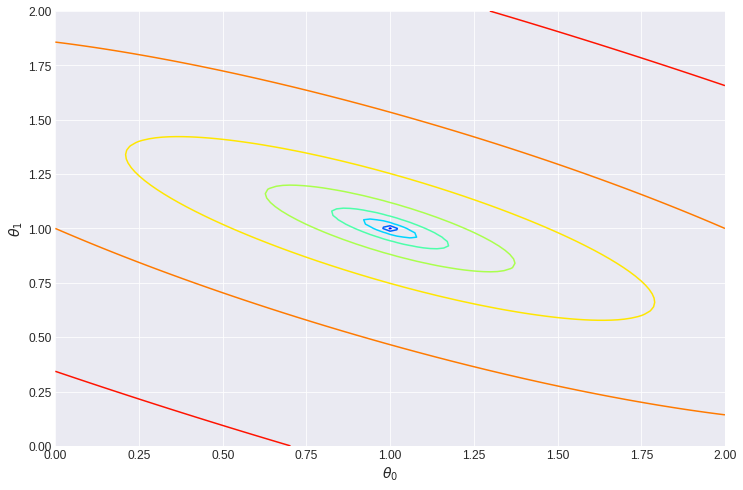

In [63]:
# plot the contours
#plt.contourf(Xp, Yp, np.log(Zp+0.0001), 10, alpha=0.75, cmap=plt.cm.cool)
#plt.colorbar()

coutours = plt.contour(Xp, Yp, np.log(Zp+0.0001), 10, cmap=plt.cm.jet)
#plt.clabel(contours, inline=1, fontsize=10);

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$');

We can also try and visualize the shape of the cost function in true 3
dimensions using a 3D plot.  It is helpful to install the needed extensions
and packages to allow for dynamic figures, and then to uncomment and use
the `%matplotlib widget` magic so that you can rotate and scale the 
3D plot to better get a sense of the shape of the cost function.

We have again plotted the `log()` of the cost values, to help with
visualizing how the cost is changing as it approches or moves away from
the minimum point.

In [64]:
#%matplotlib widget

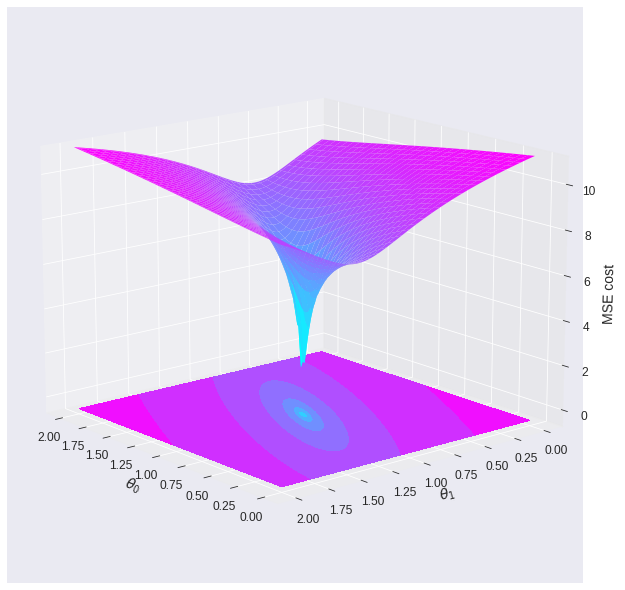

In [65]:
# need a special axes for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# create a figure object so we can add a 3D axes to it
fig = plt.figure()
ax = Axes3D(fig)

Zp_log = np.log(Zp + 0.0001)
Zp_log = Zp_log - Zp_log.min() + 0.0001
Zp_log_log = np.log(Zp_log)

ax.plot_surface(Xp, Yp, Zp_log, cmap=plt.cm.cool)
ax.contourf(Xp, Yp, Zp_log, zdir='z', offset=-0.5, cmap=plt.cm.cool);
ax.set_zlim([-0.5, 11.0]);
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'MSE cost');

ax.view_init(15, 140)
plt.show()

In [66]:
# %matplotlib inline

### Contour Plot Visualization

Lets now use the contour plot of the cost function with a representation
of a hypothesized line, to better visualize and understand the
relationship between a hypothesis $\theta = [\theta_0, \theta_1]$
and its calculated cost.

The next cell has a lot of code in it, but it basically recreats some 
previous figures side-by-side.  But given a hypothesis for 
$\theta$, we display both the hypothesized line, on the left, and
its location on the cost function, on the right.

We will also return to using our more realistic data example, fitting
a linear model of the price of houses given the size of the houses.
Recall that when we fit this data before, we found that the best
fitting line ends up with an intercept/bias term of $\theta_0 = 71.2$
and a slope feature term of $\theta_1 = 0.13$.


In [67]:
# recreate the X array with bias terms and y array for the house data
m, n = house.shape

# create array of 1s to initialize bias term, then set column 1 to be the
# size data
X = np.ones((m, n))
X[:,1] = house.sqft

# make sure y array has the house price targets
y = house.price.values

print(X.shape)
print(y.shape)

(47, 2)
(47,)


In [68]:
# create an appropriate grid of theta_0 and theta_1 for the contour plot
grid_size = 101
# theta_0 is the intercept term, the best fit intercept is at theta_0 = 71.2
theta_0 = np.linspace(-1000, 2000, grid_size)

# theta_1 is the slope term, the best fit slope is at theta_1 = 0.13
theta_1 = np.linspace(-0.5, 0.5, grid_size)

# create all combinations of theta_0 and theta_1 as a (grid_size^2, 2) shaped
# array, which is what our cost function will expect
Theta = np.array(np.meshgrid(theta_0, theta_1)).reshape(2, -1)
print(Theta.shape)

# calculate the cost over the grid
mse = cost_function_MSE(Theta, X, y)
rmse = np.sqrt(mse) # convert to the root mean squared error

# contour expects X, Y and Z to all be 2d grids, so
Xp = Theta[0].reshape((grid_size, grid_size))
Yp = Theta[1].reshape((grid_size, grid_size))
Zp = rmse.reshape((grid_size, grid_size))

(2, 10201)


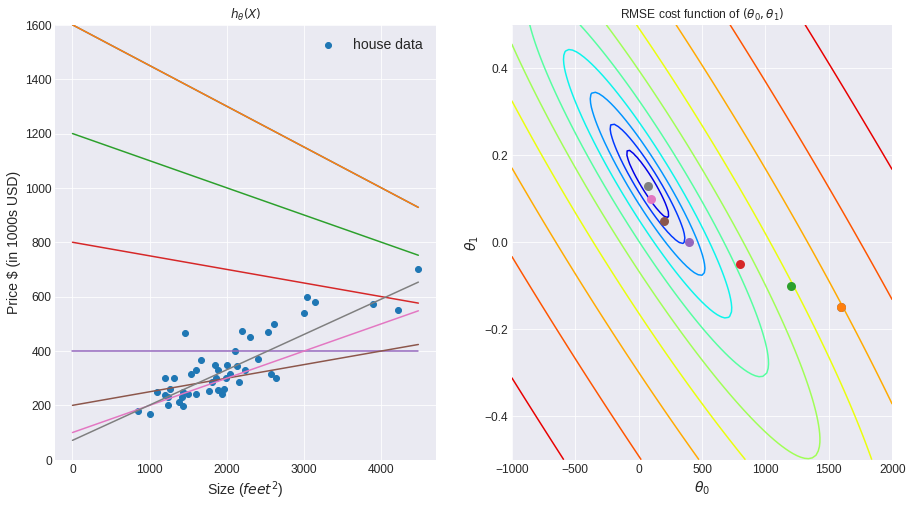

In [69]:
# create a figure for our 2 subplots, data and hypothes to left and 
# cost function contour plot on right
fig = plt.figure(figsize=(15,8))
plt.tight_layout()

# create left subplot, scatter plot of data with hypothesis
ax1 = plt.subplot(1, 2, 1)
plt.scatter(X[:,1], y, label='house data')
plt.xlabel(r'Size ($feet^2$)')
plt.ylabel('Price $ (in 1000s USD)')
plt.title(r'$h_{\theta}(X)$')
plt.ylim([0, 1600])
plt.legend();

# create right subplot, contour plot of the cost function
ax2 = plt.subplot(1, 2, 2)
contours = plt.contour(Xp, Yp, np.log10(Zp), 10, cmap=plt.cm.jet)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
#contours.levels = [val**10.0 for val in contours.levels] # convert labels back to actual RMSE
#plt.clabel(contours, inline=1, fontsize=10)
plt.title(r'RMSE cost function of $(\theta_0, \theta_1)$');


# create an example sequence of Theta=(theta_0, theta_1) hypothesis

Theta = [(1600, -0.15),
         (1200, -0.1),
         (800,  -0.05),
         (400,   0.0),
         (200,   0.05),
         (100,   0.10),
         (71.2,  0.13)]
model_x = np.linspace(0, X[:,1].max(), 2)


def animate(i):
    (h_theta_0, h_theta_1) = Theta[i]
    hypothesis_y = h_theta_0 + h_theta_1 * model_x    
    
    lbl = r'hypothesis $\theta_0 = %0.2f \; \theta_1 = %0.2f$' % (h_theta_0, h_theta_1)
    line = ax1.plot(model_x, hypothesis_y, label=lbl)
    
    # visualize location of current hypothesis
    point = ax2.plot(h_theta_0, h_theta_1, 'o', ms=7.0, mew=2.0);
    return ((line, point), )

#for (h_theta_0, h_theta_1) in Theta:
#    hypothesis_y = h_theta_0 + h_theta_1 * model_x

ani = mpl.animation.FuncAnimation(fig, animate, frames=len(Theta), interval=1000)

from IPython.display import HTML
#HTML(ani.to_jshtml())
HTML(ani.to_html5_video())

Gradient descent algorithms work by starting with initial random values (or just 0) for all of the $\theta$ model parameters.
Then we measure the gradient (or slope) of the cost function at the current values of $\theta$, with respect to each
of the dimensions.  Then we take a small step down the gradient slope for each parameter.  The step size we take
at each iteration is an example of a **hyperparameter** of the gradient descen algorithm.  The step size is
often known as the **learning rate**.  If the learning rate is too small, then the algorithm will be slow to 
converge to the minimal cost.  But if the learning rate is too big, this can cause gradient descent to
diverge.

Gradient descent is an iterative algorithm, in contrast to the normal equation, which is an analytic or exact
solution.  Exact solutions are preferable when they can be used, but there are many situations where the
normal equation will not work to find the minimal cost solution.  We have already discussed
computational complexity issues.  When the number of features of the data set becomes very large, 
exact solutions can take a very long time to compute relative to using an iterative gradient descent.
Also, not all cost functions are as well behaved as the RMSE cost we have been using as an example
so far.  The RMSE cost function is a convex function, and it only has a single global minimum
value.  So an exact solution like the normal equation is guaranteed to find the
one and only solution in that case.  

But as discussed in our textbook for Figure 4-6,
more complex cost functions do not always have these properties.  Cost functions can be
non-convex, meaning there can be more than 1 minimum point
for the cost function.  More complex cost functions can be much tougher, if not impossible, 
to solve with an analytic solution, thus requiring a minimization technique
like gradient descent to be applied.

But we do have to keep in mind these difficulties when using gradient descent.  If there are
multiple minimum points, the gradient descent will only return a single one of these for each random
starting point we begin iterating from.  The minimum we converge on may only be a local minimum, and
other much better solutions could exists elsewhere in the parameter landscape.  Also some features of
the cost function can cause issues for convergence.  Our textbook gives an example of plateaus of 
the cost function.  If our gradient descent is changing slowly, we may be at a minimum point, or we may be at
a plateau that, if we just iterate longer, we would eventually pass over to find a steeper gradient.  But it
is impossible to determine which of these might be the case just from examing the local gradient
of our cost function.  As discussed briefly, one reason that scaling features to have similar scales
can be important is that it tends to remove or lessen such plateaus in the cost function,
making gradient descent iteration more likely to run smoothly.

### Batch Gradient Descent

To implement gradient descent you need to be able to compute the gradient of the cost function with regards to each of the model
paramters $\theta_j$, which we have not mentioned up to this point.

We can give a precise meaning to this, in fact the gradient is simply the slope of the function at that point, which can be found by computing
the derivative of the function.  In this case it is technically what is known as the *partial derivative* of the function, because we want
to compute it with respect to each of the $\theta_j$ parameter dimensions of our cost function.

Getting the gradient of our cost function will of course depend on what cost function is being used.  For example, for the MSE function, which is
essentially a quadratic function (albeit using linear algebra vectors and matrices), it is relatively straight forward to derive an analytic expression
that can compute the derivatives of the cost function with respect to the model parameters.

$$
\frac{\partial}{\partial \theta_j} \text{MSE}(\theta) \frac{2}{m} \sum_{i=0}^{m-1} \big( \theta^T x^{(i)} - y^{(i)} \big) x_j^{(i)}
$$

The symbol $\frac{\partial}{\partial \theta_j}$ is simply the symbol for the partial derivative.  It has a meaning to the symbol for the derivative
of a function $\frac{d}{dx}$.  And while deriving the derivative of the MSE cost function is beyond the scope of the class here, you
should notice, if you are familiar with basic calculus and taking derivatives, that the square term of the error has been derived using
the basic power rule, e.g. $\frac{d}{dx} x^2 = 2 x ^{2-1} = 2x$, and then also a chain rule is applied so that we multiply this
by the paramter we are deriving with respect to $x_j^{(i)}$.  Notice that we change the index of the summation to $0..(m-1)$ as we did before
for our 0-based NumPy indexing.  The summation is necessayr here because we want the gradient with respect to all $m$ of the input
samples, not just the gradient of the single $i^{th}$ sample.  So we are in essense calculating and averaging over the gradients for all of 
the $m$ samples of our training data set here.  When we compute the gradient over all of the input samples, this is known as
batch gradient descent, as opposed to stochastic or mini-batches, which compute the gradient for only a single or a few of the
samples at a time (covered next).

You can use the above formula to compute the necessary gradients, and thus implement gradient descent with the MSE cost function.
However, we can further vectorize the summation, making the computation of the gradients even more efficient in NumPy.
The gradient vector, shown here, is a fector of the gradients of each of the $\theta_j$ paramters, and can be computed
with a relatively simple set of matrix multiplications:

$$
\nabla_{\theta} \text{MSE}(\theta) = 
\begin{pmatrix}
\frac{\partial}{\partial \theta_0} \text{MSE}(\theta) \\
\frac{\partial}{\partial \theta_1} \text{MSE}(\theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n} \text{MSE}(\theta) \\
\end{pmatrix}
= \frac{2}{m} X^T (X \theta - y)
$$

And while this looks complex, the $\nabla_{\theta}$ is simply a symbol meaning that the result is a vector of the gradients.  And as
you can see, the vector is basically what we would get if we computed each individual gradiant with respect to $\theta_0, \theta_1, \cdots \theta_n$
and put the resulting gradients into a vector.  In sort, the relatively simple matrix multiplication shown will compute the gradient
vector of the gradients with respect to each of our features, in a single statement for all of the $m$ samples in our
training data.

Again notice that this formula involves calculations over the full training set $X$, at each gradient descent step.  A better name for
this algorithm might be *full gradient descent* since it is calculated fully over all of the input samples $X$.  But it is
actually known as *batch gradient descent* meaning that the full batch of inputs $X$ are used for each descent step.

Once you have the gradient vector, which points uphill, we can just go in the opposite direction for each of the parameter
dimensions $\theta_j$ to go down hill.  This means subtracting the gradient vector $\nabla_{\theta} \text{MSE}(\theta)$ from
$\theta$.  This is where the learning rate hyperparameter comes in.  We will use the symbol $\eta$ for our learning
rate, and multiply the gradient by the learning rate to determine the size of our downhill step.

$$
\theta^{(\text{next step})} = \theta - \eta \nabla_{\theta} \text{MSE}(\theta)
$$

Putting this all together, we can create vectorized functions for our MSE cost function, gradients, and batch gradient descent relatively
easily.

Lets start by using randomly generated data again with an intercept/bias term
of 4 and a slope of 3.  Notice that if we calculate the cost for a hypothesis
with this intercept and slope we no longer get a cost of 0 since we added
noise into the data.  But the cost at the actual slope and intercept used to generate
the data should be close to the minimal cost we will be able to achieve.  Likewise,
if we calculate the gradients at these points, they should be close to 0, but
probably not exactly 0 because of the noise that was added.

In [70]:
# use random data for first example like before, with a slope if 3 and 
# intercept of 4
x = 2.0 * np.random.rand(100, 1)
y = 4.0 + 3.0 * x
y = y + np.random.randn(100, 1)

# create matrix adding in bias feature
X = np.ones( (100, 2) )
X[:,1] = x.flatten()

print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [71]:
# test cost, each hypothesis is in a column, where row 0 is the intercept
# and row 1 is the slope.  Column 3 is hypothesis that matches the random
# data we generated, though because of noise the cost will not be 0
# anymore, but should probably be close to the minimal cost we can expect
# to achieve
Theta = np.array([
    [0.0, 1.0, 4.0],
    [0.0, 1.0, 3.0], 
])

cost_function_MSE(Theta, X, y.reshape(1,-1))

array([53.83588789, 27.91953038,  0.90297222])

In [72]:
Theta = np.array([
    [4.0],
    [3.0], 
])

cost_function_MSE(Theta, X, y.reshape(1,-1))

array([0.90297222])

In [73]:
def gradient_function_MSE(Theta, X, y):
    """Theta is an array of 2 or more parameters of theta.  We expect Theta[0]
    (row 0) to  be the bias or intercept term, and Theta[1] (row 1) and
    greater the remaining parameters.  We also now expect that the bias
    attribute is added to the X inputs before calling this function.  We
    expect X in normal shape (m,n) with m rows representing the samples, and 
    n feature columns.  The number of columns n here needs to match the number
    of rows of Theta and number of targets in the outputs y.  Since X is
    arranged with samples along the rows, but mathematical notation
    expects each column to have a sample, have to transpose X before using.
    
    This function computes the gradients of the MSE cost function for the
    inputs X with respect to the target outputs y, at the given current
    model paramter settings Theta.  This function returns the
    gradient vector, a vector of n gradients with respect to each of the
    model paramters Theta[j]
    
    Parameters
    ----------
    Theta - A NumPy array of 1 or more Theta hypothesis.  The shape 
        needs to be (n, t) where we have 1 row for each feature.
        You can multiple columns, one for each potential
        hypothesis function to test, or a single column.
    X - A NumPy array of values to compute the gradients of, expected to be 
        a matrix shaped (m, n) in the normal way with m rows holding
        the samples, and n feature columns.  This is transpose of how
        mathemetical equations are specified, so we take transpose of X
        before using in our calculations.
    y - A NumPy array of values that are the true labels or target
        that our hypothesis function tries to predict.  Expected to
        be a vector of size (m,)
        
    Returns
    -------
    gradient vector - returns a vector or n gradients, one with respect to
        each of the n model paramters of Theat.
    """
    # get the number of samples m and number of features n
    m, n = X.shape
    
    # calculate predictions, result is a (t,m) shaped array of a set of
    # predictions for each of the m samples, one row for each of the 
    # Theta predictions being generated
    predictions = Theta.T @ X.T # X needs to be made into column matrix
    
    # calculate errors, resulting shape is still (t,m), the y target will be
    # subtracted from each row by broadcasting
    errors = predictions - y.reshape(1,-1)
    
    # calculate gradients
    gradients = X.T @ errors.T
    
    # get gradient averages and return
    gradients = (2.0 / m) * gradients
    return gradients

In [74]:
print(gradient_function_MSE(Theta, X, y))

[[-0.15996724]
 [-0.10668267]]


Our implementation of the gradient calculations is similar to what the book
shows, though we do have to transpose a few things differently.  We need
to transpose the X input array for the initial caculations because the formula
you see in our text assume that X and y are column matrices/vectors, with samples
in each column instead of rows as we normally think of them.  

Given the gradients function, performing gradient descent is a simple
loop/iteration, where we calculate gradients and use them to calculate a 
step size based on the learning rate.  Most of the code in this function is 
actually to keep a history of the optimization, rather than the
actual work of calculating the gradients and update Theta for
each step.

In [75]:
def batch_gradient_descent(X, y, num_iter=1000, eta = 0.1):
    """This function performs batch gradient descent.  We iterate performing steps 
    down the gradient for some number of fixed iterations.  Theta
    is initialized to 0's initially by this function, and the minimal
    Theta achieved is returned, along with a hisory of the Theta values
    that were stepped through.  We are given the input samples X and the correct
    labels y we are to optimize for.
    
    Parameters
    ----------
    X - A NumPy array of input values to fit a linear model to using MSE cost
        function.  The array should be of size (m, n) where m = number of sample
        rows and n = number of feature columns
    y - A NumPy array of values that are the true lables or targets that we
        are fitting our linear function to.  Expected to be a vector of
        size (m,)
    num_iter - Number of gradient descent iterations to perform.  Defaults to 
        1000.
    eta - The learning rate to use for gradient descent steps, defaults to 0.1.
        
    Returns
    -------
    Theta - Returns the final best fit Theta parameter vectors
    history - A history of the Theta and gradients, returned as list of
        tuples (Theta, cost, gradients)
    """
    # get the number of samples m and number of features n
    m, n = X.shape
    
    # create random / 0 initial starting point for Theta
    Theta = np.zeros( (n, 1) )
    
    # keep and return history of gradient descent
    history = []
    
    # iterate down the gradient
    for iter in range(num_iter):
        # calculate current cost and the gradients w/respect to our current parameters
        cost = cost_function_MSE(Theta, X, y)
        gradients = gradient_function_MSE(Theta, X, y)
        
        # keep track of history of our gradient descent
        history.append( (Theta, cost, gradients) )
        #print('Itr %d: cost: %0.4f' % (iter, cost[0]))
        #print('    Theta: ')
        #print(Theta)
        
        # update 1 gradient descent step down the gradient according to the learning rate
        Theta = Theta - (eta * gradients)
        
    # return the final result
    return Theta, history

We can demonstrate how the batch gradient descent performs on the random data.
As shown in our textbook, try running the next few cells with different
values of the learning rate $\eta$.  A learning rate of 0.1 will converge, though
after only 10 iterations we are still pretty far from the optimal
fit (look at the final slope and intercept parameters).  You might need to
run more like 100 or 1000 iterations to get a slope closer to 3 and intercept
closer to 4.  But it converges much faster than say a learning rate of 0.02.
You should especially also try a larger learning rate, like $\eta = 0.5$.
You should observe in this case that the cost goes up, not down, and the
fitted lines get further and further away from the data.  This is an example
of divergence for the gradient descent algorithm.  When the learning rate is too
large, the next step will actually make the fit worse, not better, and when that
happens, successive steps will converge even further from the optimal
solution.

In [76]:
num_iter = 10
learning_rate = 0.1
Theta, history = batch_gradient_descent(X, y, num_iter=num_iter, eta=learning_rate)
print('Theta best fit: ')
print(Theta)

Theta best fit: 
[[3.43004784]
 [3.51911782]]


In [77]:
Theta_history = [h[0] for h in history]
cost_history = [h[1] for h in history]
gradient_history = [h[2] for h in history]

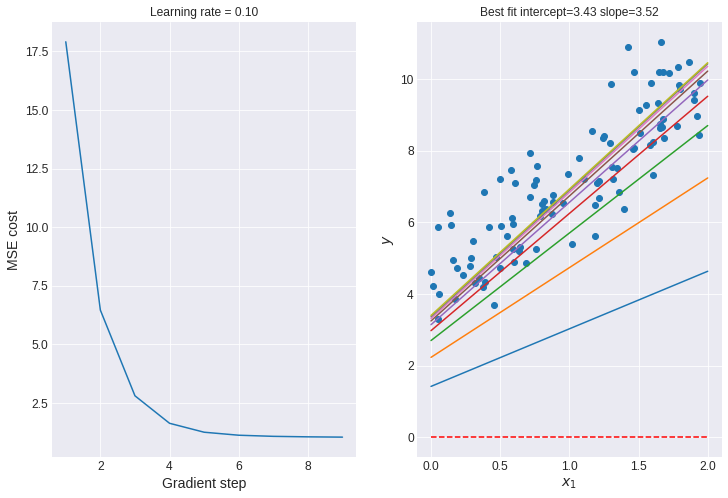

In [78]:
# visualize the resulting gradient descent
steps = np.arange(num_iter)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(steps[1:], cost_history[1:]) # omit first history to see slope better 
plt.xlabel('Gradient step')
plt.ylabel('MSE cost');
title='Learning rate = %0.2f' % learning_rate
plt.title(title);

plt.subplot(1,2,2)
plt.scatter(x, y);
theta_0, theta_1 = Theta_history[0]
x_h = np.linspace(0, 2, 2)
y_h = theta_0 + theta_1 * x_h
plt.plot(x_h, y_h, 'r--') # plot initial starting/random as red dashed line
for (theta_0, theta_1) in Theta_history[1:]:
    y_h = theta_0 + theta_1 * x_h
    plt.plot(x_h, y_h)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')
title = 'Best fit intercept=%0.2f slope=%0.2f' % (Theta[0], Theta[1])
plt.title(title);

In the previous example we used a made up random data set.  If you try using the
batch gradient descent on, for example, our house price data, you may find that
it doesn't seem to work very well.  The learning_rate is way too high, so if you use
0.1 initially you will see that the gradient descent quickly diverges.  But
even for a learning rate that doesn't appear to diverge, you may find it difficult
to get the algorith to converge to the best fit, which recall
has a value of $\theta_0 = 71.27$ for the intercept and a value of $\theta_1 = 0.13$
for the slope.

In [79]:
# recreate the X array with bias terms and y array for the house data
m, n = house.shape

# create array of 1s to initialize bias term, then set column 1 to be the
# size data
X = np.ones((m, n))
X[:,1] = house.sqft

# make sure y array has the house price targets
y = house.price.values

print(X.shape)
print(y.shape)

(47, 2)
(47,)


In [80]:
num_iter = 100000
learning_rate = 0.0000002
Theta, history = batch_gradient_descent(X, y, num_iter=num_iter, eta=learning_rate)
print('Theta best fit: ')
print(Theta)

Theta best fit: 
[[0.38039765]
 [0.16521852]]


Even if you carefully find a learning rate that doesn't diverge and train for a long time,
it doesn't appear to get very close to the true optimal fit.

This is because of the different scale issue mentioned previously and by our textbook.
The house size has values in the range from 800 to 4500 square feet, which is a much
different scale than the bias parameter.  In order to successfully fit this data with
a gradient descent we have to rescale our parameter to be approximatly in the same range as
the bias parameter.

In [81]:
# just to get an idea of the current range
print(X[:,1].min(), X[:,1].max())

# shift all values so min becomes 0
orig_min = X[:,1].min()
X[:,1] = X[:,1] - orig_min

# rescale so all values in range 0 to 1
orig_max = X[:,1].max()
X[:,1] = X[:,1] / orig_max

print(X[:,1].min(), X[:,1].max())


852.0 4478.0
0.0 1.0


Now that we have rescaled to use min-max scaling, lets try again with
a 0.1 learning rate like we had been using as well.

In [82]:
num_iter = 1000
learning_rate = 0.1
Theta, history = batch_gradient_descent(X, y, num_iter=num_iter, eta=learning_rate)
print('Theta best fit: ')
print(Theta)

Theta best fit: 
[[185.91071917]
 [487.71409712]]


This doesn't look like the same intercept and slope, but this is the
value that converged for our data where we have scaled the 
house size x inputs to the range from 0 to 1. 

If we want to know what the slope and intercept are in our original
system, we have to recover the slope and intercept from these
values for our original unscaled data.  We can do this by
using the theta parameters we found to make predictions of 2
points, then unscale the x values back to our origanal
units.  And then finally, given the 2 points with our
x feature now unscaled, we can recover the slope and intercept
discovered on the scaled data.

In [83]:
# the slope and intercept we just found using gradient descent on
# the scaled x data
scaled_theta_0, scaled_theta_1 = Theta[:,0]
scaled_theta_0, scaled_theta_1

(185.91071916812388, 487.71409711687744)

In [84]:
# using our scaled slope and intercept, find 2 points on the prediction
# line this represents, using scaled x values of 0 and 1
x_1, y_1 = 0.0, scaled_theta_0 + scaled_theta_1 * 0.0
x_2, y_2 = 1.0, scaled_theta_0 + scaled_theta_1 * 1.0

print(x_1, y_1)
print(x_2, y_2)

0.0 185.91071916812388
1.0 673.6248162850013


In [85]:
# scale x values back to original range of house size in square feet
x_1 = (x_1 * orig_max) + orig_min
x_2 = (x_2 * orig_max) + orig_min

# we now have 2 points on the fitted line but where x is now 
# unscaled and back to the original units of square feet
print(x_1, y_1)
print(x_2, y_2)

852.0 185.91071916812388
4478.0 673.6248162850013


In [86]:
# determine equation of the line using these points, these are the
# actual theta parameters found on data before scaling x values
theta_1 = (y_2 - y_1) / (x_2 - x_1) # slope is change in y divided by change in x
theta_0 = y_1 - theta_1 * x_1 # from slope can determine intercept
print(theta_0, theta_1)

71.31270186432367 0.1345047151453054


So at the end you should see that the gradient descent did in fact
converge on the correct solution, though we have to recover
the slope and intercept for the original unscaled units after 
we converge to parameters in the scaled units.

### Stochastic Gradient Descent

Batch (or full batch) gradient descent uses the whole training set to compute
the gradients at every step.  The gradients returned from above is an
average of the gradient for each dimension over all $m$ samples of the
training set.  If $m$ the number of samples is very large, this can make it
very slow to compute all of the gradients to take a step.  And if $m$ is truly
large, the data might not all fit into your computers memory, and thus it
would become impossible to perform a full batch gradient step if you
can't calculate the gradients for all samples since you can't have all
samples in memory at 1 time.

This leads to the idea of **stochastic gradient descent**
(**SGD**).  Stochastic here is just
a term that means random.  For stochastic gradient descent, instead of calculating
the gradient for all $m$ samples simultaneously, we instead select 1 sample
at random, calculate the gradients with respect to that single sample, and update
the $\theta$ parameters with regards to those gradienst.

This makes the alrogirhm faster, or at least we can update the theta paramters
by just calculating 1 single gradient rather gradients for all of the $m$
samples.  It also makes it possible to perform gradient descent for huge
data sets.  Even if not all inputs can fit into memory, we can calculate
steps using the samples we have in memory, then unload them and load other
data to calculate descent steps for these new samples.

But because of the random nature of selecting the next sample to optimze with at random, this algorithm is much less regular than batch gradient descent.  Instead
of gently decreasing until it reaches the minimum, the cost function will bounce
up and down, decreasing only on average.

Because of the more noisy nature of the resulting gradient descent, it becomes
much more essential to be a bit cleaverer with the learning rate.  In particular,
we might want to start with a large learning rate initially, but actually change
it and have it get smaller as training progresses.  This is an example of a
dynamic learning rate or **learning rate schedule**.  Usually we allow the
learning rate to vary, decreasing as a function of the number of iterations 
performed.

The simplest idea for SGD is to simply perform sumber number of epochs, where
each epoch we iterate $m$ times (the size of the samples).  But we pick
a single training item at random, calculate the gradients for this item,
and make our step based only on the single gradient.  Our functions for
calculating cost and gradients will work fine if we pass in a single
sample, so we can reuse those functions without change.

The following is the simplest example of SGD, though we do add in a learning
schedule function.  The learning sechdule function looks like this,
and it is a function of the epoch and the sample item index within
an epoch.

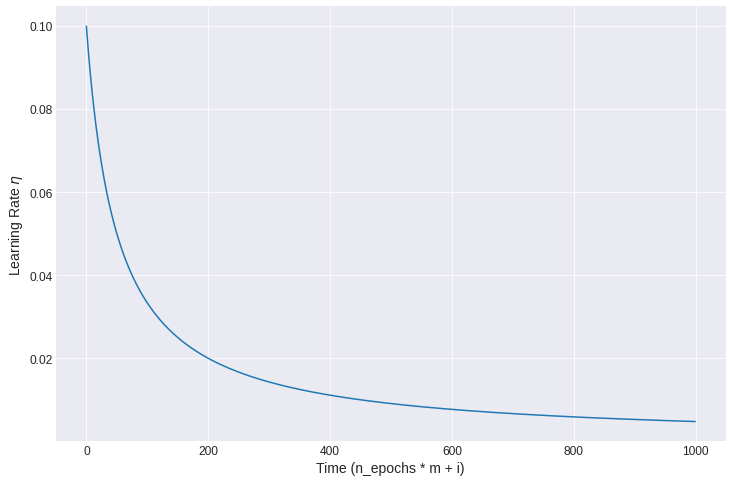

In [87]:
def learning_schedule(t):
    """The time t is just the epoch * m + i.  So it is really the total number
    of iterations performed so far.
    """
    # learning schedule hyperparameters, these could be turned into parameters of
    # this function if needed
    t0, t1 = 5, 50
    return t0 / (t + t1)

# show what the learning schedule function looks like
n_epochs = 10 # number of epochs we will perform
m = 100 # the number of samples m that we sample each epoch
t = np.arange(n_epochs * m)
plt.plot(t, learning_schedule(t))
plt.xlabel('Time (n_epochs * m + i)')
plt.ylabel(r'Learning Rate $\eta$');

In [88]:
def stochastic_gradient_descent(X, y, num_epochs=1000):
    """This function performs stochastic gradient descent.  We perform the
    indicated number of epochs.  During each epoch we iterate m times, where
    m is the number of samples in the training data X.  Theta
    is initialized to 0's initially by this function, and the minimal
    Theta achieved is returned, along with a hisory of the Theta values
    that were stepped through.  We are given the input samples X and the correct
    labels y we are to optimize for.
    
    Parameters
    ----------
    X - A NumPy array of input values to fit a linear model to using MSE cost
        function.  The array should be of size (m, n) where m = number of sample
        rows and n = number of feature columns
    y - A NumPy array of values that are the true lables or targets that we
        are fitting our linear function to.  Expected to be a vector of
        size (m,)
    num_epochs - Number of gradient descent epochs to perform.  During each
        epoch we perform m iterations where m is the number of samples in
        the input data X.
        
    Returns
    -------
    Theta - Returns the final best fit Theta parameter vectors
    history - A history of the Theta and gradients, returned as list of
        tuples (Theta, cost)
    """
    # get the number of samples m and number of features n
    m, n = X.shape
    
    # create random / 0 initial starting point for Theta
    Theta = np.zeros( (n, 1) )
    
    # keep and return history of gradient descent
    history = []
    
    # iterate down the gradient
    for epoch in range(num_epochs):
        # randomly sample an item m times for each epoch, using the randoly selected
        # item to perform a gradient step
        
        # we will keep history before start of each epoch
        cost = cost_function_MSE(Theta, X, y)
        
        # keep track of history of our gradient descent
        history.append( (Theta, cost) )
        #print('Epoch %d: cost: %0.4f' % (epoch, cost[0]))
        #print('    Theta: ')
        #print(Theta)

        for iter in range(m):
            # select an item at random, use slicing to extract the item
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # calculate current cost and the gradients w/respect to our current parameters
            gradients = gradient_function_MSE(Theta, xi, yi)
            
            # calculate learning rate using schedule
            eta = learning_schedule(epoch * m + iter)
            
            # update 1 gradient descent step down the gradient according to the learning rate
            Theta = Theta - (eta * gradients)
        
        
    # return the final result
    return Theta, history

In [89]:
# use random data for first example like before, with a slope if 3 and 
# intercept of 4
x = 2.0 * np.random.rand(100, 1)
y = 4.0 + 3.0 * x
y = y + np.random.randn(100, 1)

# create matrix adding in bias feature
X = np.ones( (100, 2) )
X[:,1] = x.flatten()

print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [90]:
num_epochs = 50
Theta, history = stochastic_gradient_descent(X, y, num_epochs=num_epochs)
print('Theta best fit: ')
print(Theta)

Theta best fit: 
[[3.72865811]
 [3.18334328]]


In [91]:
Theta_history = [h[0] for h in history]
cost_history = [h[1] for h in history]

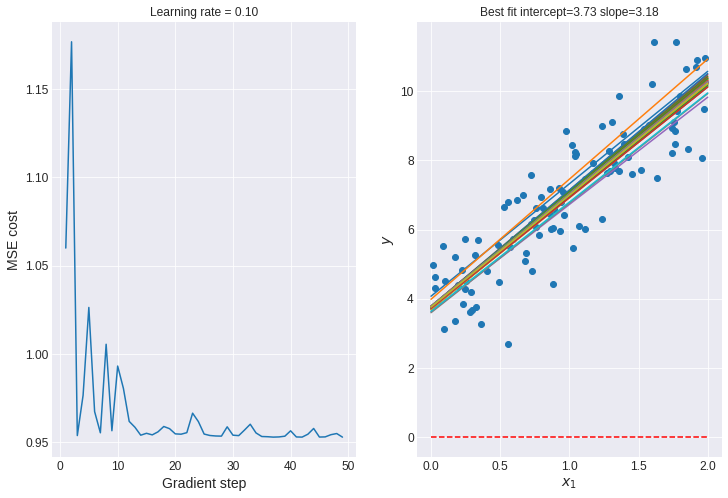

In [92]:
# visualize the resulting gradient descent
steps = np.arange(num_epochs)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(steps[1:], cost_history[1:]) # omit first epoch so can see cost better
plt.xlabel('Gradient step')
plt.ylabel('MSE cost');
title='Learning rate = %0.2f' % learning_rate
plt.title(title);

plt.subplot(1,2,2)
plt.scatter(x, y);
theta_0, theta_1 = Theta_history[0]
x_h = np.linspace(0, 2, 2)
y_h = theta_0 + theta_1 * x_h
plt.plot(x_h, y_h, 'r--') # plot initial starting/random as red dashed line
for (theta_0, theta_1) in Theta_history[1:]:
    y_h = theta_0 + theta_1 * x_h
    plt.plot(x_h, y_h)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')
title = 'Best fit intercept=%0.2f slope=%0.2f' % (Theta[0], Theta[1])
plt.title(title);

The simple implementation above has one big drawback.  It is possible during
an epoch that some samples get selected multiple times, while others are not
selected at all.  It would be ideal for gradient descent if items
were selected randomly, but also if all items are selected and represented.  Over
the long run, we would expect all items to be selected an equal amount of
times if the random number generation is truly random.

But a better alternative that is almost as easy to implement in Python is to
instead ensure that all items are selected 1 time for each epoch.  A common way to
do this is to create a set of $m$ indexes and randomly shuffle them.  These
indexes can then be itereated over in sequence, ensuring that each item is selected
exactly 1 time in each epoch.  

In [93]:
def stochastic_gradient_descent(X, y, num_epochs=1000):
    """This function performs stochastic gradient descent.  In this second
    version we enforce that each sample item is selected exactly 1 time
    during each epoch.  We perform the indicated number of epochs iterations.
    During each epoch we iterate m times, where m is the number of samples
    in the training data X.  Theta is initialized to 0's initially by this
    function, and the minimal Theta achieved is returned, along with a hisory
    of the Theta values that were stepped through.  We are given the input
    samples X and the correct labels y we are to optimize for.
    
    Parameters
    ----------
    X - A NumPy array of input values to fit a linear model to using MSE cost
        function.  The array should be of size (m, n) where m = number of sample
        rows and n = number of feature columns
    y - A NumPy array of values that are the true lables or targets that we
        are fitting our linear function to.  Expected to be a vector of
        size (m,)
    num_epochs - Number of gradient descent epochs to perform.  Within each
        epoch we perform m iterations, where m is the number of samples in the
        input training set X.
        
    Returns
    -------
    Theta - Returns the final best fit Theta parameter vectors
    history - A history of the Theta and gradients, returned as list of
        tuples (Theta, cost)
    """
    # get the number of samples m and number of features n
    m, n = X.shape
    
    # create random / 0 initial starting point for Theta
    Theta = np.zeros( (n, 1) )
    
    # keep and return history of gradient descent
    history = []
    
    # iterate down the gradient
    for epoch in range(num_epochs):
        # randomly sample an item m times for each epoch, using the randoly selected
        # item to perform a gradient step
        
        # we will keep history before start of each epoch
        cost = cost_function_MSE(Theta, X, y)
        
        # keep track of history of our gradient descent
        history.append( (Theta, cost) )
        #print('Epoch %d: cost: %0.4f' % (epoch, cost[0]))
        #print('    Theta: ')
        #print(Theta)

        # create a randomly shuffled index schedule to use for this epoch
        random_indexes = list(range(m))
        np.random.shuffle(random_indexes) # shuffled in place
        
        for iter in range(m):
            # select an item at random, use slicing to extract the item
            random_index = random_indexes[iter]
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # calculate current cost and the gradients w/respect to our current parameters
            gradients = gradient_function_MSE(Theta, xi, yi)
            
            # calculate learning rate using schedule
            eta = learning_schedule(epoch * m + iter)
            
            # update 1 gradient descent step down the gradient according to the learning rate
            Theta = Theta - (eta * gradients)
        
        
    # return the final result
    return Theta, history

In [94]:
num_epochs = 50
Theta, history = stochastic_gradient_descent(X, y, num_epochs=num_epochs)
print('Theta best fit: ')
print(Theta)

Theta best fit: 
[[3.78351652]
 [3.21086154]]


In [95]:
Theta_history = [h[0] for h in history]
cost_history = [h[1] for h in history]

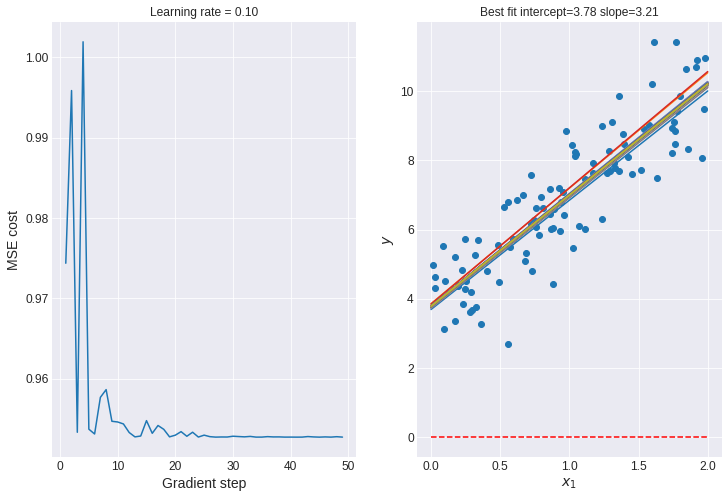

In [96]:
# visualize the resulting gradient descent
steps = np.arange(num_epochs)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(steps[1:], cost_history[1:]) # omit first epoch so can see cost better
plt.xlabel('Gradient step')
plt.ylabel('MSE cost');
title='Learning rate = %0.2f' % learning_rate
plt.title(title);

plt.subplot(1,2,2)
plt.scatter(x, y);
theta_0, theta_1 = Theta_history[0]
x_h = np.linspace(0, 2, 2)
y_h = theta_0 + theta_1 * x_h
plt.plot(x_h, y_h, 'r--') # plot initial starting/random as red dashed line
for (theta_0, theta_1) in Theta_history[1:]:
    y_h = theta_0 + theta_1 * x_h
    plt.plot(x_h, y_h)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')
title = 'Best fit intercept=%0.2f slope=%0.2f' % (Theta[0], Theta[1])
plt.title(title);

By default, as our text discussed briefly, the `LinearRegressor` object of
`Scikit-learn` actually uses an exact method based on singular value
decomposition.  However, if you have truly big data but still want to
use `Scikit-learn`, you can use an SGD iterative algorithm to fit a linear
regrsssion using the `SGDRegressior` estimator object from the sklearn
library.

The `SGDRegressor` defaults to optimizing the squared error cost function,
but as you would imagine has much more sophisticated learning schedules
and algorithm parameters.  To use the sklearn object for SGD regression,
we can do the following.  Here the code runs for a maximum of 1000 epochs
(more than we have been doing by hand in previous 2 examples).  There is
an early stopping condition, if the loss drops by less than
$.001$ (`1e-3`) during an epoch we will stop.  There is a built in learning
rate schedule, but we specify that we start with a learning rate of $0.1$,
which is similar to what our own defined learning schedule function does.
No regularization is used (`penalty=None`), we will discuss regularization
in a bit.

In [97]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel()) # notice, we use x, without the bias terms added in

SGDRegressor(eta0=0.1, penalty=None)

In [98]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.77791957]), array([3.22088337]))

In [99]:
sgd_reg.n_iter_

10

### Mini-batch Gradient Descent

The last gradient descent algorithm we will look at is called
**mini-batch gradient descent**.  It is simple to understand once you
have looked at batch and stochastic gradient descent.  Mini-batch
is a compromise between the two.  Instead of only looking at 1
sample (stochastic) or the whole batch of samples, we will instead
select a small batch of samples of size $N$ at random, calculate gradients
for this batch, and perform an update step based on these gradients.
The size of a mini-batch is a hyperparameter of this variant of
gradient descent.  Because it is a batch of samples, the loss and
progress will tend to be smoother than pure stochastic gradient descent,
but will of course have some variation, so not as smooth as full batch
gradient descent.  But you can make batches relatively big, but still much
smaller than what your in-core memory can handle.  So mini-batch like
stochastic descent can be used for huge data sets, where you need to
load batches into memory at a time.  It is generally a good
compromise, which will make for smoother progress than only 1 sample
at a time, while still retaining the benefits of stochastic sampling.

As a final variation, we can add a hyperparameter `batch_size` to our
previous implementation, and use the idea of random shuffled
indexes like our previous version to feed in mini-batches we 
slice off in `batch_size` chunks.

In [100]:
def minibatch_gradient_descent(X, y, num_epochs=1000, batch_size=10):
    """This function performs mini-batch gradient descent.  In this third
    version we sample randomly from the samples, like stochastic descent.
    But we sample batch_size items for each update.  We perform the
    indicated number of epochs iterations.
    During each epoch we iterate m times, where m is the number of samples
    in the training data X.  Theta is initialized to 0's initially by this
    function, and the minimal Theta achieved is returned, along with a hisory
    of the Theta values that were stepped through.  We are given the input
    samples X and the correct labels y we are to optimize for.
    
    Parameters
    ----------
    X - A NumPy array of input values to fit a linear model to using MSE cost
        function.  The array should be of size (m, n) where m = number of sample
        rows and n = number of feature columns
    y - A NumPy array of values that are the true lables or targets that we
        are fitting our linear function to.  Expected to be a vector of
        size (m,)
    num_epochs - Number of gradient descent epochs to perform.  Within each
        epoch we perform m iterations, where m is the number of samples in the
        input training set X.
        
    Returns
    -------
    Theta - Returns the final best fit Theta parameter vectors
    history - A history of the Theta and gradients, returned as list of
        tuples (Theta, cost)
    """
    # get the number of samples m and number of features n
    m, n = X.shape
    
    # create random / 0 initial starting point for Theta
    Theta = np.zeros( (n, 1) )
    
    # keep and return history of gradient descent
    history = []
    
    # iterate down the gradient
    for epoch in range(num_epochs):
        # randomly sample an item m times for each epoch, using the randoly selected
        # item to perform a gradient step
        
        # we will keep history before start of each epoch
        cost = cost_function_MSE(Theta, X, y)
        
        # keep track of history of our gradient descent
        history.append( (Theta, cost) )
        #print('Epoch %d: cost: %0.4f' % (epoch, cost[0]))
        #print('    Theta: ')
        #print(Theta)

        # create a randomly shuffled index schedule to use for this epoch
        random_indexes = list(range(m))
        np.random.shuffle(random_indexes) # shuffled in place
        bi = 0
        ei = batch_size
        iter = 0
        while bi < m:
            # select a batch using the random_index shuffled list of index.  We
            # get out a list of integers we use as an index mask into the X and y arrays
            idx_mask = random_indexes[bi : ei]
            xi = X[idx_mask]
            yi = y[idx_mask]
            
            # calculate current cost and the gradients w/respect to our current parameters
            gradients = gradient_function_MSE(Theta, xi, yi)
            
            # calculate learning rate using schedule
            eta = learning_schedule(epoch * m + iter * batch_size)
            
            # update 1 gradient descent step down the gradient according to the learning rate
            Theta = Theta - (eta * gradients)
        
            # update batch indexes for next iteration
            bi += batch_size
            ei += batch_size
            iter += batch_size
            if ei > m:
                ei = m
        
    # return the final result
    return Theta, history

In [101]:
num_epochs = 50
batch_size = 5
Theta, history = minibatch_gradient_descent(X, y, num_epochs=num_epochs, batch_size=batch_size)
print('Theta best fit: ')
print(Theta)

Theta best fit: 
[[3.62262425]
 [3.35275867]]


In [102]:
Theta_history = [h[0] for h in history]
cost_history = [h[1] for h in history]

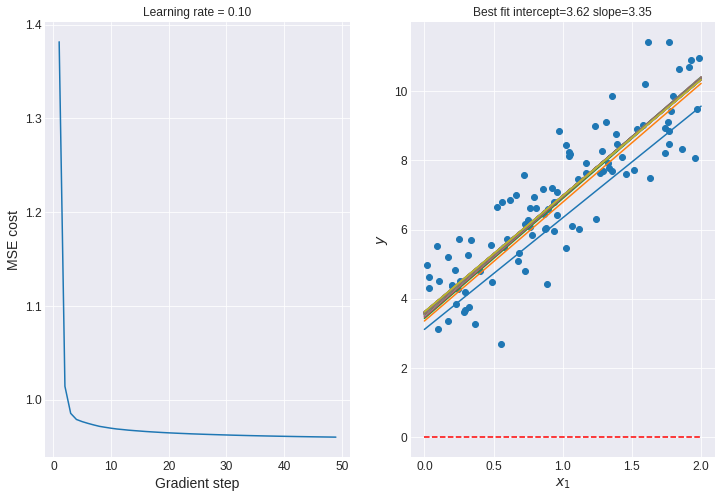

In [103]:
# visualize the resulting gradient descent
steps = np.arange(num_epochs)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(steps[1:], cost_history[1:]) # omit first epoch so can see cost better
plt.xlabel('Gradient step')
plt.ylabel('MSE cost');
title='Learning rate = %0.2f' % learning_rate
plt.title(title);

plt.subplot(1,2,2)
plt.scatter(x, y);
theta_0, theta_1 = Theta_history[0]
x_h = np.linspace(0, 2, 2)
y_h = theta_0 + theta_1 * x_h
plt.plot(x_h, y_h, 'r--') # plot initial starting/random as red dashed line
for (theta_0, theta_1) in Theta_history[1:]:
    y_h = theta_0 + theta_1 * x_h
    plt.plot(x_h, y_h)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')
title = 'Best fit intercept=%0.2f slope=%0.2f' % (Theta[0], Theta[1])
plt.title(title);

## 4.3 Polynomial Regression

A best fit regression using least squared cost function (MSE) can actually do more than fit a simple straight line.  Although this technique doesn't work
with exact solutions, since those depend on solving for the exact linear cost function an expression that can be minimized.  But if we use
gradient descent, we can calculate the gradients even when we have terms other than linear terms.

An example might make this clearer.  This technique can be used to try and fit even larger polynomial functions, beyond 2nd-degree polynomials.  In fact, as we will
see later, you can easily demonstrate the concept of overfitting by fitting very high degree polynomials to data.

As we have been doing, lets create some random data again.  But this time, the true relationship with have a quadratic (2nd-degree) term in our function.
We will model a system governed by a quadratic equation where

$$
y = \frac{1}{2} x^2 + \frac{3}{4}x + 3
$$

plus some noise as before.


In [104]:
# number of samples in our system
m = 100

# x values randomly range from -3 to 3
X = 6 * np.random.rand(m) - 3

# create y targets
y = 0.5 * X**2.0 + 0.75 * X + 3.0

# but make the y targets a bit noisy
y = y + np.random.randn(m)*0.5

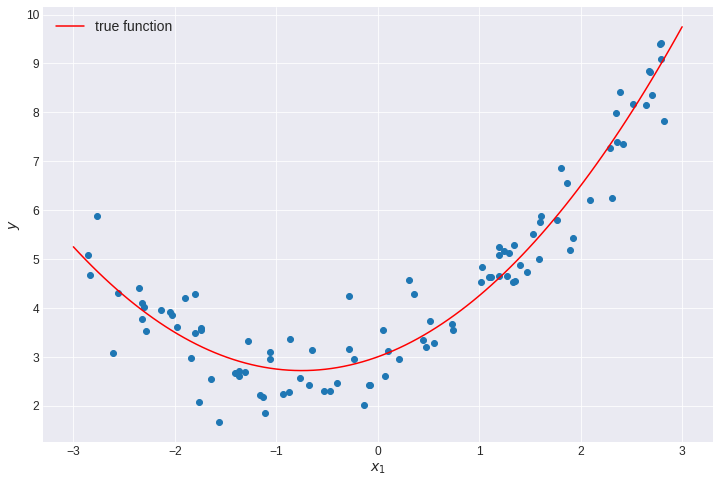

In [105]:
# display the target data, along with the true quadratic function that generated the relationship between
# the variable x and the target value y
plt.scatter(X, y);
x_h = np.linspace(-3.0, 3.0, 100)
y_h = 0.5 * x_h**2.0 + 0.75 * x_h + 3.0
plt.plot(x_h, y_h, 'r-', label='true function')
plt.xlabel(r'$x_1$')
plt.ylabel('$y$')
plt.legend();

Clearly a straight line will not fit the noisy data points, it clearly has some nonlinear relationship.  We could use the `np.polyfit()` from NumPy
to estimate the coefficients of the $x^2$ and the $x$ terms as well as the bias term.

In [106]:
# fit a 2nd degree polynomial to the data, returns the coefficients of the
# for y = ax^2 + bx + c
(a,b,c) = np.polyfit(X, y, 2)
print(a,b,c)

0.4950832506078642 0.7529983674756544 2.99353986698607


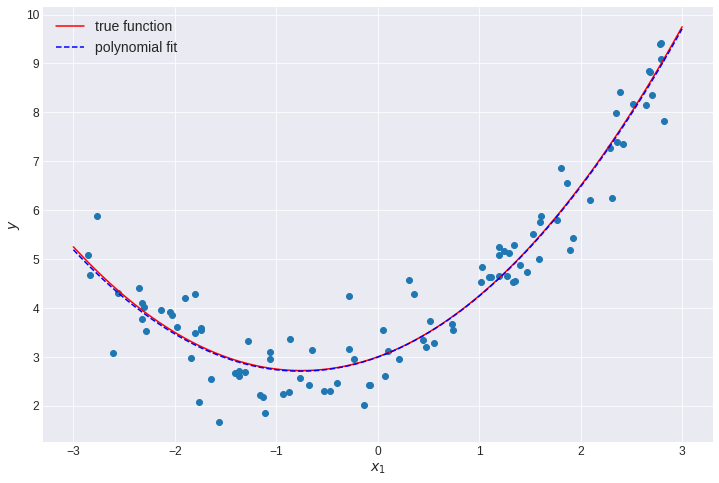

In [107]:
# plot again with the estimated polynomial fit to the function
# display the target data, along with the true quadratic function that generated the relationship between
# the variable x and the target value y
plt.scatter(X, y);

x_h = np.linspace(-3.0, 3.0, 100)
y_h = 0.5 * x_h**2.0 + 0.75 * x_h + 3.0
plt.plot(x_h, y_h, 'r-', label='true function')

y_fit = a * x_h**2.0 + b * x_h + c
plt.plot(x_h, y_fit, 'b--', label='polynomial fit')

plt.xlabel(r'$x_1$')
plt.ylabel('$y$')
plt.legend();

The general technique though works like this.  Imagine that we use a function with
two features:

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

However, we will relate features the features like this $x_2 = x_1^2$.
If we originally only have features $x_1$, we could create the
$x_2$ features by simply squaring the $x_1$ features we are given and
adding as an additional column of input to our input training data.

For example, we can use Scikit-learn's `PolynomialFeatures` class
to do this.

In [108]:
from sklearn.preprocessing import PolynomialFeatures
# create all degree 2 combination features 
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# sklearn expects a column matrix instead of a vector
X = X.reshape((m,1))

# create the degree 2 polynomial feature
X_poly = poly_features.fit_transform(X)

In [109]:
print(X.shape)
print(X_poly.shape)

# show the first 5 values of X and of X_poly
print(X[:5,:])
print(X_poly[:5,:])

(100, 1)
(100, 2)
[[ 2.67281568]
 [-0.46674892]
 [-1.80252162]
 [ 1.92435734]
 [-1.74056288]]
[[ 2.67281568  7.14394368]
 [-0.46674892  0.21785455]
 [-1.80252162  3.24908418]
 [ 1.92435734  3.70315116]
 [-1.74056288  3.02955915]]


The additional column in `X_poly` is simply the square of each of the
features in the original data.  Thus column 0 is the $x_1$ linear feature
and column 1 is our $x_2 = x_1^2$ square feature column.

We can then fit this data with a regular linear regression using
a Scikit-learn `LinearRegression` object to also estimate the parameters.

In [110]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(2.993539866986068, array([0.75299837, 0.49508325]))

You should get pretty much the exact same fit using this method as with 
the `np.polyfit()` method, so we won't plot the true function and fit
again.  

With either method the fit is not bad, the model estimates
$\hat{y} = 0.51 x_1^2 + 0.79 x_1 + 2.98$ when in fact the original
function was $y = 0.5x_1^2 + 0.75x_1 + 3.0 + \text{gaussian noise}$

When there are multiple features, the `PolynomialFeatures` can add not only
degree powers of individual features, but all possible combinations of
features and their degrees as well. For example, if there were two
features $a$ and $b$, `PolynomialFeatures` with `degree=3` would
add not only $a^2$, $a^3$, $b^2$ and $b^3$ but also the combinations $ab$,
$a^2b$ and $ab^2$.

In [111]:
# Create example of 10 samples of 2 random features
X = np.random.randint(-7, 7, (10,2))

# add all combinations of features up to degree 3
poly_features = PolynomialFeatures(degree=3, include_bias=False)

# transform to add the features, will increase from the 2 features, to
# add in the 7 other combinations mentioned
X_poly = poly_features.fit_transform(X)

# display first 2 rows, so you can check, should be in order
# a, b, a^2, ab, b^2, a^3, a^2b, ab^2, b^3 
X_poly[:2,:]

array([[  -2.,    3.,    4.,   -6.,    9.,   -8.,   12.,  -18.,   27.],
       [  -5.,   -3.,   25.,   15.,    9., -125.,  -75.,  -45.,  -27.]])

## 4.4 Learning Curves

As we mentioned before, if you perform high-degree polynomial regression, you
will likely fit the data much better than with plain linear regression.
But when you do this, are you actually building a better model of the data?
**NOTE**: This is an important concept, all supervisied machine learning
is an attempt to build the best most general model that fits the data and
will generalize well to new data.  A model is not better just because it
fits the data you create/train it with well.


For example, we can use our quadratic system again we used before, and
fit a linear, quadratic and a 300-degree polynomial to the data and
see what we get.


In [112]:
# create a set of random data, system is governed by a quadratic relationship

# number of samples in our system
m = 100

# x values randomly range from -3 to 3
X = 2 * np.random.rand(m, 1) - 1

# create y targets
y = 0.5 * X**2.0 + 0.75 * X + 3.0

# but make the y targets a bit noisy
y = y + np.random.randn(m, 1)*0.5

In [113]:
# fit a linear regression model to the data
lin_reg = LinearRegression()
lin_reg.fit(X, y);

In [114]:
# Now fit a polynomial regression of degree 2
poly_features_deg2 = PolynomialFeatures(degree=2, include_bias=False)
X_deg2 = poly_features_deg2.fit_transform(X)

deg2_reg = LinearRegression()
deg2_reg.fit(X_deg2, y)

LinearRegression()

In [115]:
# now fit a polynomial regression of degree 300
poly_features_deg300 = PolynomialFeatures(degree=300, include_bias=False)
X_deg300 = poly_features_deg300.fit_transform(X)

deg300_reg = LinearRegression()
deg300_reg.fit(X_deg300, y)

LinearRegression()

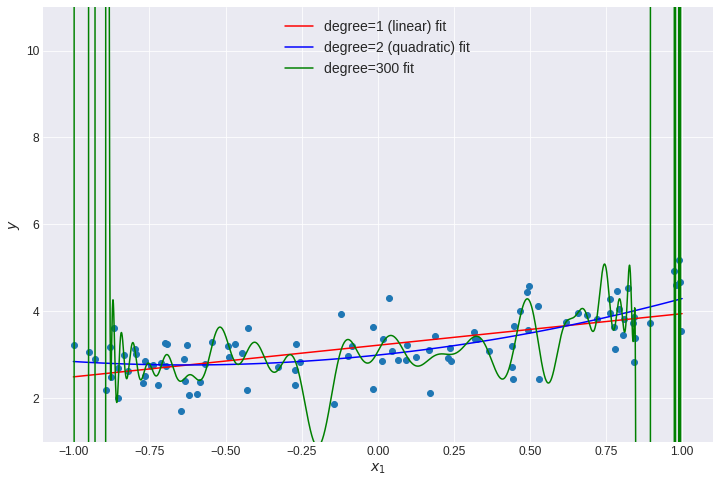

In [116]:
# visualize the fit of our 3 models

# first show the original quadratic noisy data points
plt.scatter(X, y);

# x points evenly spaced so we can plot our fitted models accurately
x_h = np.linspace(-1.0, 1.0, 100).reshape(100,1)

# display the linear fit model
yhat_lin = lin_reg.predict(x_h)
plt.plot(x_h, yhat_lin, 'r-', label=r'degree=1 (linear) fit');

# display the degree 2 fit model
x_h_deg2 = poly_features_deg2.fit_transform(x_h)
yhat_deg2 = deg2_reg.predict(x_h_deg2)
plt.plot(x_h, yhat_deg2, 'b-', label=r'degree=2 (quadratic) fit')

# display the degree 300 fit model, to see the true curve you need a much
# higher mesh resolution here
x_h = np.linspace(-1.0, 1.0, 10000).reshape(10000,1)
x_h_deg300 = poly_features_deg300.fit_transform(x_h)
yhat_deg300 = deg300_reg.predict(x_h_deg300)
plt.plot(x_h, yhat_deg300, 'g-', label=r'degree=300 fit')

# restrict the y axis so we can actually see the display
plt.ylim(1, 11)

# label the figure
plt.xlabel(r'$x_1$')
plt.ylabel('$y$')
plt.legend();

If you looked at the MSE cost functions you would see that of course the degree 300
model achieves the lowest cost.  It does this because it wiggles and squirms and
passes through many of the points in the data it is fitting.  But the degree 300
model is not the better model.  It is not modeling the true quadratic relationship,
which we know actually governs this data.  It is really modeling the noise.  The
extra parameters only serve to allow the model to fit well the incidental
noise that is present in the measure data.  But it is not capturing well
the true relationship that governs this data.  In fact, you can see on the ends
how poorly this model will do when predicting new data it was not trained
with.  The huge swings of the predictions are going to have huge prediction
errors for new data from this quadratic system.  In fact the degree 300 model
will be extremely poor at generalizing to new data, especially when compared to
a model that is correct in terms of the type of function that is generating
and governing the system.

We have already seen another method in previous lectures of ways we can
measure a model's generalization performance.  We have previously used cross-validation
to do this, holding back some of the data when training/fitting a model
so we can evaluate how well it does on unseen data.   If a model performs
well on the data you train it with, but generalizes poorly according to
held back test data or cross-validation data, then the model is 
overfitting.  If it performs poorly on both the fitting data and the validation
data, then it is underfitting.  This is one way to tell when a model is too
simple or too complex.  Here the degree 300 polynomial is too complex and it
is overfitting the data.

A common way to differentiate between under and overfitting is to look at
**learning curves**.  A learning curve is a plot where we show the cost function on both
the data we are training with, and on validation/test data that has not been seen
by the model.  If we are using an iterative algorithm like gradient descent, we can
plot the performance for each iteration or epoch of training.  Alternatively, 
we can train a with different train/validation size splits and plot the
cost as a function of the training set size.  This latter method is necessary when using
exact solutions like the normal equation.

For example, we can use the `train_test_split` function to try out a linear or polynomial
fit when we train with small or large amounts of the available.  The following function
from our textbook defines a function that plots the learning curves of a model given some
data using this method of performing multiple train/validation splits.

In [117]:
# the following examples are much clearer if we have a much larger set of data.  With only 100
# samples, there is not a whole lot of difference in performance of the linear and quadratic fit.
# create a set of random data, system is governed by a quadratic relationship

# number of samples in our system
m = 10000

# x values randomly range from -3 to 3
X = 2 * np.random.rand(m, 1) - 1

# create y targets
y = 0.5 * X**2.0 + 0.75 * X + 3.0

# but make the y targets a bit noisy
y = y + np.random.randn(m, 1) * 0.1

In [118]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    """Plot learning curves obtained with training the given scikit-learn model
    with progressively larger amounts of the training data X.
    
    Nothing is returned explicitly from this function, but a plot will be created
    and the resulting learning curves displayed on the plot.
    
    Parameters
    ----------
    model - A scikit-learn estimator model to be trained and evaluated.
    X - The input training data
    y - The target labels for training
    """
    # we actually split out 20% of the data solely for validation, we train on the other 80%
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    # keep track of history of the training and validation cost / error function
    train_errors, val_errors = [], []
    
    # train on 1 to m of the data, up to all of the data in the split off training set
    for m in range (1, len(X_train)):
        # fit/train model on the first m samples of the data
        model.fit(X_train[:m], y_train[:m])
        
        # get model predictions
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        # determine RMSE errors and save history for plotting
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    # plot the resulting learning curve
    plt.plot(np.sqrt(train_errors), 'r-', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend(fontsize=18)

First the learning curve of a plain Linear Regression model (a straight line).

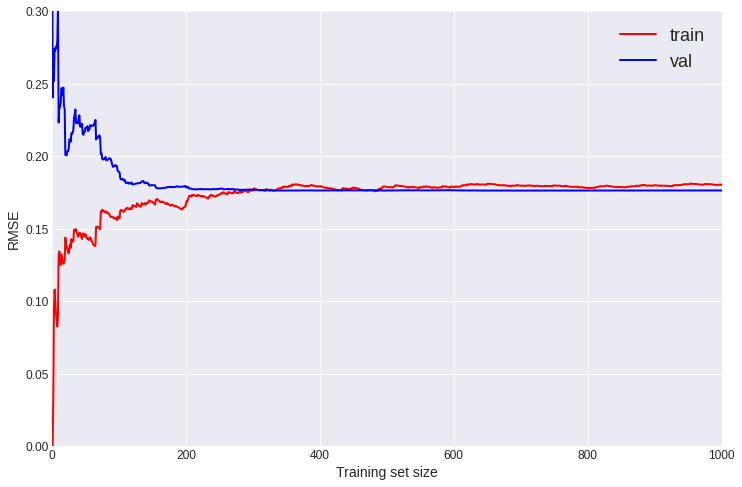

In [119]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.ylim(0, 0.3)
plt.xlim(0, 1000);

Whether you plot the train and validation error for successive epochs of an iterative gradient
descent, or like we have done here where we plot the errors as a result of changing the amount
of data we train with, in either case you will get a similar curve and be able to derive the
same information.

Here recall that our data is a quadratic function, and the linear model straight line underfits
this data.  As you would expect, when you train with a small amount of data (or a small number
of epoch), the validation error will be very high.  The training error is low here because
of course a linear model will have a small amount of error if fit to 2, 3 or a small number of
points.  But this error increases rapidly as more points are used and the line cannot fit the
data well anymore.

Recall there are two sources of error here for the linear model, the fit of a line to a quadratic
function will never be optimal.  But there is also random noise in the data, that will never
be accounted for no matter what model you are using.  Here for the training error, initially
the error is very small, but eventually it reaches a plateau at which point the average error
no longer changes much.  

For the validation error, as we mentioned, when the model is trained on very little data it performs
extremly poorly in trying to generalize to the validation data.  But its performance improves
as more data is used.  However once a straight line cannot do a good job modeling the
data, the error stops improving, very close to the training error plateau.

This is typical of an underfitting model.  Both curves reach a plateau that are fairly close 
to one another, and fairly high (which is bad, we are trying to minimize the error cost here).

We can likewise look at the very high degree polynomial model, which we have stated is overfitting
the data.

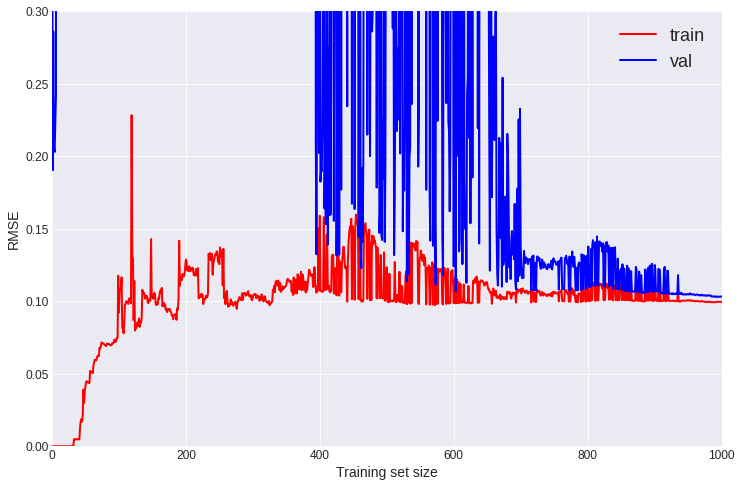

In [120]:
from sklearn.pipeline import Pipeline

# an example of scikit-learn API here, a pipeline is just a sequence of fit/transform/predict objects,
# so even though our data is only degree-1, the pipeline will first transform to the
# high-degree model, then fit the linear regression to the high-dimensional polynomial transformed data
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
# error is so big in spots, we have to clip it
plt.ylim(0, 0.3)
plt.xlim(0, 1000);

As mentioned in the textbook, these curves do look similar here, and it can sometimes be
difficult to distinguish under and over fitting.  Though this is only a
degree-10 polynomial, instead of a truly large degree.  The overfitting is of course much
more obvious if you try fitting an even higher degree polynomial.  There are some differences,
especially if you look at even worse overfitting by using even more complex polynomial
models:

- The error on the training data is a bit lower than with the Linear Regression model.  This is because
the polynomial model has more wiggle, so it can perfectly fit the data for much longer, and can
overfit and model some of the noise in the data as well.
- There will usually be a gap between the curves when overfitting is the prevalent problem.
For a degree-10 model you won't always see this.  But validation will be much worse for degree 20
or higher polynomial degrees than on the training data.

When the model performs significantly better on the training data than with the validation data, then
you are likely seeing overfitting.  However, if you could use a much larger training set, the
two curves would continue to get closer (as they often do here for a degree-10 polynomial).  This is
because even if your model is overpowered, if you have lots of data it still cannot continue to
overfit well for the large data set, and will thus begin to demphasize or remove the
higher-order parameters that are not useful in getting a good fitting and generalizable model.

The quadratic model will thus have curves where the training data error is as good or
better than the previous 2, and the validation error will approach the same low
error levels as the training data error.
  

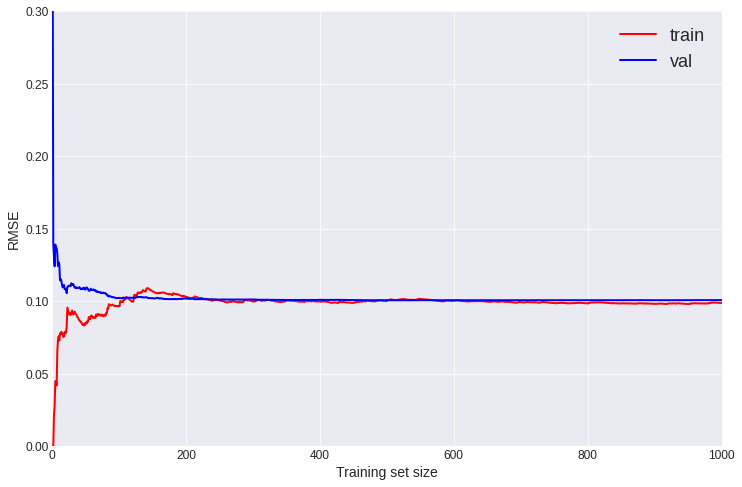

In [121]:
from sklearn.pipeline import Pipeline

# an example of scikit-learn API here, a pipeline is just a sequence of fit/transform/predict objects,
# so even though our data is only degree-1, the pipeline will first transform to the
# 2nd-degree model, then fit the linear regression to the 2nd-dimensional polynomial transformed data
quadratic_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(quadratic_regression, X, y)
plt.ylim(0,0.3)
plt.xlim(0, 1000);

### The Bias/Variance Tradeoff

You should always be aware that there are multiple sources of generalization error in the data you have that you want
to try and build a model of.  

**Bias** - This part of the generalization error is due to wrong assumpitons, such as assuming a linear
model when the data is actually quadritic.  A high-bias model is most likely to underfit the training data.

**Variance** - This part of generalization error is due to a model's excessive sensitivity to small
variations in the training data.  A model with many degrees of freedom (e.g. many weights or parameters to be fit, like a high-degree polynomial fit) is likely to have high variance, and thus to overfit the
training data.

**Irreducible error** - This part of generalization error is due to the noisiness of the data itself.
This error cannot be reduced from a more accurate model, the most accurate model can never eliminate
irreducible noise from the data.  The only way to reduce this part of the error is to clean the data
(e.g. fix or use more accurate sensors and methods to collect the data, or detect outliers or
other ways to clean data after the fact of noise).

Bias and variance are two ends of a spectrum, increasing a models complexity will typically increase
its variance and reduce its bias.  Conversely reducing a model's complexity will increase its bias
and reduce its variance.  Thus you can tradeoff one for the other, and you get the best balance
when your model accurately reflects the process that generates the relationship between the
data you are trying to model.

## 4.5 Regularized Linear Models

In practice we will never know what the right complexity of the model is we should use to get
the best balance of bias and variance.  But if the model seems like it might be overfitting, we
can try and reduce this by **regularizing** the model.  For example, a good way to reduce overfitting
and regularize a polynomial regression is to reduce the number of polynomial degrees.

Most ML supervised learning models have similar ways to regularize them.  For a linear model (like many
other types of methods) regularization is typically achieved by constraining the weights of
the model in some way.

### Ridge Regression

**Ridge regression** is a regularized version of linear regression.  We simply add in 
a **regularization term** to the cost function, like this:

$$
\text{regularization penality} = \alpha \sum_{i=1}^{n} \theta_i^2
$$

We basically sum up the square of the $n$ parameters/weights of the linear model.  Thus if these
parameters are really high, the regularization penality will be high.  So for example, for a
polynomial regression with many high-degree terms, this penality will tend to make the
fitting want to reduce the weights to small or 0 values, especially when the high-degree
terms are not hellping the model in reducing the RMSE error for the data much.

The regularization penality term should only be added to the cost function during training.  Once
trained, you want to evaluate the model's error performance using the unregularized performance
measure.

The hyperparameter $\alpha$ controls how much weight is given to the regularization penalty.
Of course if $\alpha = 0$ then there is no penality, and ridge regression simply reduces
to regular linear regression.  But if $\alpha$ is very large, then all weights
will tend to end up very close to zero, and the result will be a flat line going through the
data's mean.

So for example, for ridge regression the cost function (often called $J(\theta)$) looks like
this:

$$
J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\sum_{i=1}^n \theta_i^2
$$

Notice that the summation is summing over the $n$ features we are fitting (not the m samples) because
we are penalizing based on the feature weight parameter values.  Notice also that
the sum starts at $i = 1$, so we do not include the bias/intercept term $\theta_0$ in our
regularized penality term.  

As an example, lets train several ridge regression models.  We will use our made up quadratic data,
and a degree 10 polynomial fit.  

In [122]:
# number of samples in our system
m = 100

# x values randomly range from -3 to 3
X = 2 * np.random.rand(m,1) - 1

# create y targets
y = 0.5 * X**2.0 + 0.75 * X + 3.0

# but make the y targets a bit noisy
y = y + np.random.randn(m,1)*0.5

In [123]:
from sklearn.linear_model import Ridge

# ridge regression using alpha of 0, e.g. just a linear regression
ridge_reg_0 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('ridge_reg', Ridge(alpha=0, solver='svd')),
])
ridge_reg_0.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('ridge_reg', Ridge(alpha=0, solver='svd'))])

In [124]:
# ridge regression using small alpha of 0.001
ridge_reg_small = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('ridge_reg', Ridge(alpha=1.0, solver='svd')),
])
ridge_reg_small.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('ridge_reg', Ridge(solver='svd'))])

In [125]:
# ridge regression using alpha of 1
ridge_reg_1 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('ridge_reg', Ridge(alpha=100.0, solver='svd')),
])
ridge_reg_1.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('ridge_reg', Ridge(alpha=100.0, solver='svd'))])

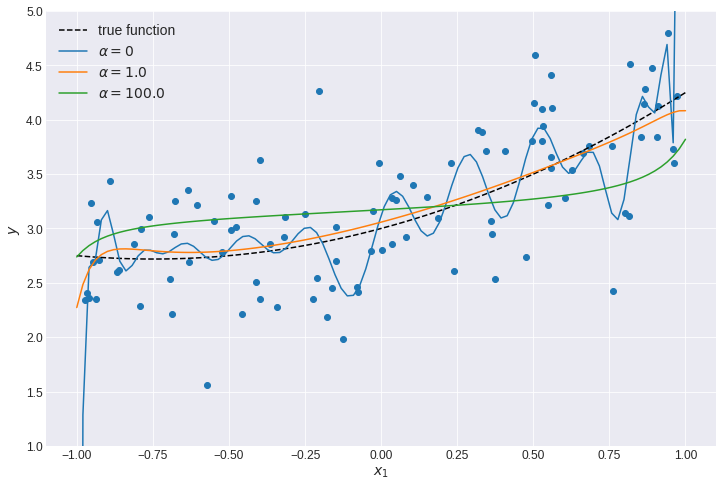

In [126]:
# display the target data, along with the true quadratic function that generated the relationship between
# the variable x and the target value y
plt.scatter(X, y);
x_h = np.linspace(-1.0, 1.0, 100)
y_h = 0.5 * x_h**2.0 + 0.75 * x_h + 3.0
plt.plot(x_h, y_h, 'k--', label='true function')

# add predictions from alpha=0 linear regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, ridge_reg_0.predict(x_h), label=r'$\alpha = 0$')

# add predictions from alpha=small ridge regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, ridge_reg_small.predict(x_h), label=r'$\alpha = 1.0$')

# add predictions from alpha=s1 ridge regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, ridge_reg_1.predict(x_h), label=r'$\alpha = 100.0$')

# add labels and info to plot
plt.xlabel(r'$x_1$')
plt.ylabel('$y$')
plt.ylim(1, 5)
plt.legend();

Notice that with no regularization ($\alpha = 0$) the model badly overfits, it wiggles and squirms
around to hit the data points, as we saw before.  But adding just the right amount of
regularization, like $\alpha = 1.0$ results in a model that reduces most of the 
unneded high-order polynomial feature weights to 0, and fits the curve relatively well.
If you add on too much regularization, you will end up reducing all feature parameters
to 0, and get a straight line ($\alpha = 100.0$)

If you look at the actual parameters for the $\alpha = 1.0$ ridge regression model, you
will see this.  Recall that the actual data is generated from 
$\frac{1}{2} x^2 + \frac{3}{4} x + 3$

In [127]:
ridge_reg_small['ridge_reg'].intercept_, ridge_reg_small['ridge_reg'].coef_

(array([3.05821669]),
 array([[ 0.75188592,  0.37158855, -0.09885391,  0.05886204, -0.10344798,
          0.02456088, -0.03267832,  0.03227657,  0.02019383,  0.02887399,
          0.04761915,  0.01198772,  0.05750763, -0.0120535 ,  0.05762016,
         -0.03780385,  0.05309608, -0.06197231,  0.04689301, -0.08293994,
          0.0405615 , -0.10013257,  0.03483009, -0.11356062,  0.02997517]]))

In [128]:
ridge_reg_1['ridge_reg'].intercept_, ridge_reg_1['ridge_reg'].coef_

(array([3.17186544]),
 array([[0.15494287, 0.02937324, 0.08270335, 0.02014356, 0.05759124,
         0.01487953, 0.04490847, 0.01145589, 0.03694014, 0.00888401,
         0.03124198, 0.00683667, 0.02686965, 0.00518504, 0.02338166,
         0.0038552 , 0.02053268, 0.00279057, 0.01816736, 0.00194343,
         0.0161786 , 0.00127323, 0.01448866, 0.00074601, 0.01303932]]))

While not perfect, you will see that the first two coefficient, which are the $x^1$ and
$x^2$ coefficients, are generally the larger ones.  Most others are closer to 0, though
the terms that are still powers of 2, like the $x^4, x^8$ etc. tend to be still the higher terms
as they will have similar effects to the $x^2$ term here.

The regularization term we have used for ridge regression is actually the norm of the
feature weight vector (see linear algebra review). This is known as the l-2 (or $\ell_2$) norm.
So in many models you will see l-2 regularization as an option, which is the same thing, adding
on a penality based on the size of the feature weight parameters.

For example, using an `SGDRegressor`, which by default use the RMSE cost function, we can get
ridge regression by asking the regressor object to apply `l2` penality to the cost, which
is the regularization we have been using.

In [129]:
# fit regression using stochastic gradient descent on a degree-25 model
sgd_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('sgd_reg', SGDRegressor(penalty='l2', alpha=0.1)),
])
sgd_reg.fit(X, y.ravel())
sgd_reg['sgd_reg'].intercept_, sgd_reg['sgd_reg'].coef_

(array([2.95739525]),
 array([ 0.36942933,  0.41786142,  0.15933123,  0.15596757,  0.09481853,
         0.06741978,  0.06841819,  0.02853489,  0.05409639,  0.00792572,
         0.04444958, -0.00442542,  0.03717214, -0.01233393,  0.03141744,
        -0.01752316,  0.0267819 , -0.02090454,  0.02301587, -0.02302511,
         0.01993853, -0.02424346,  0.01741021, -0.02480833,  0.01532078]))

### Lasso Regression

**Least Absolute Shrinkage and Selection Operator Regression** (simply called *lasso regression*)
is another regularized version of linear regression.  Just like ridge regression, it adds
a regularization penality.  But it uses the l-1 ($\ell_1$) norm of the weight vector, which
is just the sum of the absolute values.

$$
J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|
$$

We can recreate our previous model using a lasso regression instead.  The two types of regularization
penalities have different properties.  The $\ell_1$ regularization using the absolute value will
be more likely to completely eliminate the least important weights of the least important features.
This can be especially useful for the scenario we are using here, as there are no actual
features in the true data relationship above the degree-2 feature.

In [130]:
from sklearn.linear_model import Lasso

In [131]:
# lasso regression using alpha of 0, e.g. just a linear regression
lasso_reg_0 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('lasso_reg', Lasso(alpha=0.000000001)),
])
lasso_reg_0.fit(X, y)

/opt/anaconda3/envs/python3-datasci/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.677752128237737, tolerance: 0.0043908953262289515
  positive)


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('lasso_reg', Lasso(alpha=1e-09))])

In [132]:
# lasso regression using alpha of 1
lasso_reg_small = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('lasso_reg', Lasso(alpha=0.01)),
])
lasso_reg_small.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('lasso_reg', Lasso(alpha=0.01))])

In [133]:
# lasso regression using alpha of 100
lasso_reg_1 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('lasso_reg', Lasso(alpha=1.0)),
])
lasso_reg_1.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('lasso_reg', Lasso())])

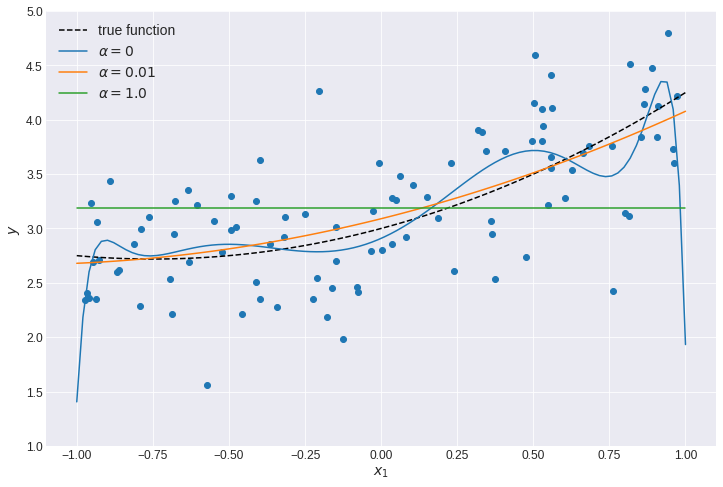

In [134]:
# display the target data, along with the true quadratic function that generated the relationship between
# the variable x and the target value y
plt.scatter(X, y);
x_h = np.linspace(-1.0, 1.0, 100)
y_h = 0.5 * x_h**2.0 + 0.75 * x_h + 3.0
plt.plot(x_h, y_h, 'k--', label='true function')

# add predictions from alpha=0 linear regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, lasso_reg_0.predict(x_h), label=r'$\alpha = 0$')

# add predictions from alpha=small ridge regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, lasso_reg_small.predict(x_h), label=r'$\alpha = 0.01$')

# add predictions from alpha=s1 ridge regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, lasso_reg_1.predict(x_h), label=r'$\alpha = 1.0$')

# add labels and info to plot
plt.xlabel(r'$x_1$')
plt.ylabel('$y$')
plt.ylim(1, 5)
plt.legend();

In [135]:
lasso_reg_small['lasso_reg'].intercept_, lasso_reg_small['lasso_reg'].coef_

(array([3.08966699]),
 array([ 0.69914499,  0.28905948,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ]))

In [136]:
lasso_reg_1['lasso_reg'].intercept_, lasso_reg_1['lasso_reg'].coef_

(array([3.18865466]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]))

Notice the effect is particularly good here when we get the $\alpha$ parameter
at a good level for this data.  Lasso eliminates all of the highre order terms, and
even though we have a highly powered model, determines it only needs the $x^1$ and $x^2$
feater weights to model the data well.

Notice also again that when the hyperparameter $\alpha$ is too large, all weights
are eliminated, and we end up with a straight line prediction that goes through
the mean value of the data.

Note that in the above example, we could again instead also use `SGDRegressor` but with
a `penality="l1"` to obtain the same cost function as the lasso regression.

### Elastic Net

If you understand ridge regression and the $\ell_2$ regularization penality using the squares of the
weights, and lasso regression and the $ell_1$ regularization penality using the absolute
values, then an elastic net is a simple combination of the two.

The equation for an elastic net regression where we combine both types of regularization is

$$
J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^n |\theta-i| + \frac{1 - r}{2} \alpha \sum_{i=1}^n \theta_i^2
$$

Here $\alpha$ controls the importance of both of the regularization penalities.  $r$ is another hyperparameter
that determins the mixing of the two types of regularization.  When $r = 0$ of course
there is no $\ell_1$ regularization, so this is equivalant to using only $\ell_2$
regularization.  And similarly when $r = 1$ the $\ell_2$ regularization drops out and
you only have $\ell_1$ regularization.  A value in between will result in a mix
of the two types.

So when should you use $\ell_1$ vs $\ell_2$ or both?  It is almost always preferable to
use a model that is too powerful, and explore regularization hyperparameters to reduce
the model complexity to better fit the bias / variance tradeoff.  Ridge / $\ell_2$ is a
good default to try first, because usually all or many of the features may actually be
useful in predicting your data.  But if you suspect that some or many of your features are actually
not useful predictors, then using lasso / $\ell_1$ regularization is the way to go, as we just
demonstrated in our examples with our random data.

Scikit-learn also has an `ElasticNet` class you may use.  Notice you use the
named parameter `l1_ratio=0.5` to specify the `r` value, e.g. the balance between
l-1 and l-2 regularization.

In [137]:
from sklearn.linear_model import ElasticNet

elastic_net_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('elastic_net_reg', ElasticNet(alpha=0.01, l1_ratio=0.5)),
])
elastic_net_reg.fit(X, y)
elastic_net_reg['elastic_net_reg'].intercept_, elastic_net_reg['elastic_net_reg'].coef_,

(array([3.07706507]),
 array([ 0.70390369,  0.32425405,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ]))

### Early Stopping

A very different way to regularize iterative learning algorithms such as
gradient descent is to employ **early stopping**.  For any model you
are training with an iterative learning algorithm, the validation error should start off
initially high, but will reduce along with the training error.  However, 
for a model that will overfit, at some point the training set error will continue to reduce,
but the validation error will begin to rise again.  This is the point where the
model has begun to overfit the data.  If you detect and stop training at this point (or keep
a history so you can use the model when reached at this point), then you can effectively
also reduce overfitting.  

However determining when this point occurs can be a challenge.  With stochastic and
mini-batch gradient descent, the error curves will not decrease smoothly.  So determining when
the average validation / test cost has stopped decreasing and is starting to increase can
be a challenge.  Likewise, you can also be stuck in plateaus, so it can be easy to misidentify 
a long slow crawl on a plateau for the end of making progress on the validation error.